# Global Observations of Nonlinear Mesoscale Eddies 
## Introduction
<div class="alert alert-block alert-info">
<b>The purpose of this notebook is to:</b>
    <li>Read in eddy-tracking datasets</li>
    <li>Process the datasets to only include WCR- and CCR-like eddies in the Northwest Atlantic</li>
    <li>Plot the formation patterns, seasonal cycles, and formation trends of the eddies</li>
</div>

### Datasets: 
☆<a href="https://www.aviso.altimetry.fr/en/data/products/value-added-products/global-mesoscale-eddy-trajectory-product/meta2-0-dt.html">The Altimetric Mesoscale Eddy Trajectories Atlas (META2.0) </a> <br>
The primary dataset used in this notebook is *The Altimetric Mesoscale Eddy Trajectories Atlas (META2.0)*. <a href="https://www.aviso.altimetry.fr/fileadmin/documents/data/products/value-added/Schlax_Chelton_2016.pdf"> Schlax & Chelton, 2016</a> give a product description of *META2.0*, which built upon <a href="https://www.sciencedirect.com/science/article/pii/S0079661111000036"> Chelton et al., 2011</a>. 

<a href="https://www.aviso.altimetry.fr/en/data/products/value-added-products/global-mesoscale-eddy-trajectory-product/meta3-1-exp-dt.html">The Mesoscale Eddy Trajectories Atlas (META3.1EXP) </a> <br>
The *Mesoscale Eddy Trajectories Atlas Product Verison 3.1 Experimental (META3.1EXP)* was first published in March 2022 and is an update to *META2.0*. The details of this product are described in <a href="https://essd.copernicus.org/articles/14/1087/2022/"> Pegliasco et al., 2022</a> which inherited an eddy-tracking algorithm developed by <a href="https://journals.ametsoc.org/view/journals/atot/31/5/jtech-d-14-00019_1.xml"> Mason et al., 2014</a> that is inpsired by <a href="https://www.sciencedirect.com/science/article/pii/S0079661111000036"> Chelton et al., 2011</a>.

<a href="https://zenodo.org/record/7349753">The Global Lagrangian Eddy Dataset (GLED v1.0) </a> <br>
The third eddy product differs from the *META* datasets because it uses Lagrangian methods to identify and track eddies. This dataset was created by <a href="https://essd.copernicus.org/articles/15/1765/2023/"> Liu and Abernathy, 2023</a> as the Lagrangian alternative to Eulerian eddy products like *META2.0* and all the successive Eulerian eddy products inspired by <a href="https://www.sciencedirect.com/science/article/pii/S0079661111000036"> Chelton et al., 2011</a>. 

<a href="https://www.bco-dmo.org/dataset/810182">Yearly census of Gulf Stream Warm Core Ring formation from 1980 to 2017</a><br>
The WCR census uses the <a href="https://jcgulfstream.com/charts/">Clark charts</a> to document the formation and demise dates, locations, and the area at formation for all WCRs formed between 1980 and 2017 that lived for a week or more. 

### Motivation: 
<a href="https://www.nature.com/articles/s41598-019-48661-9"> Gangopadhyay et al., 2019</a> found a regime shift in the number of warm core rings formations between 1980–1999 and 2000–2017. <a href="https://www.nature.com/articles/s41598-021-81827-y"> Silver et al., 2021</a> expanded upon this work and also found a regime shift in warm core rings, but *no* regime shift in cold core rings. **We seek to understand if a regime shift, and similar results, can be detected using a global mesoscale eddy dataset such as META2.0.** 

<div class="alert alert-block alert-info">
<b>The goal of this work is to:</b>
    <li>Repeat similar analyses as Silver et al., 2021 for eddy datasets that have been filtered to only include warm core ring- and cold core ring-like eddies</li>
    <li>Check if these eddy datasets detect a regime shift in Gulf Stream rings</li>
    <li>Analyize the formation patterns, seasonal cycles, and formation trends of the eddies</li>
    <li>Test if META2.0 and similar products could be used to study Gulf Stream rings</li>
</div>

<div class="alert alert-block alert-warning">
<b>Note:</b> The META2.0 dataset, or Chelton eddy tracks, are no longer recommended for use. Instead, AVISO reccomends using META3.1EXP. When this project began, that warning did not exist and META3.1EXP had not been published. Hence why we primarily use the META2.0 dataset.
</div>
    
## Import Functions:

In [2]:
%%time
# adds upper level to working directory
import sys
sys.path.append("..")

# import the util functions
from utils.ring_data_utils import *
from utils.ring_plot_utils import *

CPU times: user 1.54 s, sys: 272 ms, total: 1.81 s
Wall time: 2.9 s


### File Structure

This project's folder looks like:<br>
<UL> <b>rings
      <UL> data <br>
      <UL> dataframes <br> </UL>
      <UL> excel <br> </UL>
      <UL> GLED <br> </UL>
      <UL> gulf_stream <br> </UL>
      <UL> META <br> </UL>
      <UL> OISST <br> </UL>
      <UL> ring_census <br> </UL>
      <UL> SSH <br> </UL>
      <b>figures<br>
      <UL> animation_plots</UL>
      <b>rings_repo <br>
      <UL> <font color='red'>notebooks ☆</font> <br>
      utils <br></UL> </b> </b> </b> 
</UL>

## Process Data:
Only un-comment the cell below if you want to (re-)create these pandas dataframes (which are used in the rest of the notebook). After this cell has been run once, you will have all the necessary dataframes saved in the data/dataframes folder.

<br>
    
<UL> <b>data</b>
      <UL> <b>dataframes</b> <br>
      <UL> nwa_<font color='blue'>ccr</font>like_eddies.pkl <br> </UL>
      <UL> nwa_<font color='red'>wcr</font>like_eddies.pkl <br> </UL>
      <UL> zone_<font color='blue'>ccr</font>like_yyyy_formations <br> </UL>
      <UL> zone_<font color='red'>wcr</font>like_yyyy_formations <br> </UL>
      <UL> zone_<font color='blue'>ccr</font>like_yyyy_mm_formations <br> </UL>
      <UL> zone_<font color='red'>wcr</font>like_yyyy_mm_formations <br> </UL>
</UL>
</UL>
<br> 

<div class="alert alert-block alert-danger">
<b>Note:</b> If the DataFrames above already exist, do not run the next cell; proceed to the "Load data" cell.
</div>

In [2]:
%%time
# This function takes ~38 minutes to run, ~18 min per dataframe
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
" Function:                                                                                               "
"    meta2_eddy_to_nwa_ringlike_eddies                                                                     "
"                                                                                                         "
" Description:                                                                                            "
"    The meta2_eddy_to_nwa_ringlike_eddies function reads in META eddy datasets and converts it to         " 
"    a pandas dataframe, filters out eddies that don't qualify as WCR-like or CCR-like, and saves         "
"    the WCR-like and CCR-like eddy dataframes in the data/dataframes folder.                             "
"                                                                                                         "
" Input:                                                                                                  " 
"    path (String)         : path to where the META eddy dataset is stored                                "
"                                                                                                         "
" Output:                                                                                                 "
"    (None)                : saves pandas dataframe of eddy trajectories for wcr-like and ccr-like eddies "
"                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# This function takes ~4 seconds to run
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
" Function:                                                                                               "
"    eddy_df_to_formation_counts_df                                                                    "
"                                                                                                         "
" Description:                                                                                            "
"    The eddy_df_to_formation_counts_df takes filtered wcr- & ccr-like eddy dataframes and creates        " 
"    dataframes that tally formations of rings for all zones by year (e.g., zone_wcr_yyyy_formations)     "
"    as well as formations by month and year (e.g., zone_wcr_yyyy_mm_formations) then saves those         "
"    dataframes in the data/dataframes folder.                                                            "
"                                                                                                         "
" Input:                                                                                                  " 
"    eddy_wcr_df (DataFrame) : pandas dataframe of eddy trajectories for wcr-like eddies                  "
"    eddy_ccr_dr (DataFrame) : pandas dataframe of eddy trajectories for ccr-like eddies                  "
"                                                                                                         "
" Output:                                                                                                 "
"    (None)                  :  saves formation counts dataframes in the data/dataframes folder           "
"                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# How to proceed
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                                                                                         "
"  Uncomment the 3 lines below to create the ring-like eddy dataframes from the META2.0 eddy dataset      "
"  and create the formation counts dataframes. Note: make sure your path is correct                       "
"                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# path_to_META2 = '/Users/elenaperez/Desktop/rings/data/META/META2_0/eddy_trajectory_dt_2.0_19930101_20200307.nc'
# meta2_eddy_to_nwa_ringlike_eddies(path_to_META2)
# eddy_df_to_formation_counts_df('meta2')
# formation_counts_df_to_excel('meta2')


# path_to_META31_anticyclonic = '/Users/elenaperez/Desktop/rings/data/META/META3_1/META3.1exp_DT_allsat_Anticyclonic_long_19930101_20200307.nc'
# path_to_META31_cyclonic = '/Users/elenaperez/Desktop/rings/data/META/META3_1/META3.1exp_DT_allsat_Cyclonic_long_19930101_20200307.nc'
# meta31_eddy_to_nwa_ringlike_eddies(path_to_META31_anticyclonic, path_to_META31_cyclonic)
# eddy_df_to_formation_counts_df('meta31')
# formation_counts_df_to_excel('meta31')

CPU times: user 39 µs, sys: 5 µs, total: 44 µs
Wall time: 55.1 µs


'""\n"                                                                                                         "\n"  Uncomment the 3 lines below to create the ring-like eddy dataframes from the META2.0 eddy dataset      "\n"  and create the formation counts dataframes. Note: make sure your path is correct                       "\n"                                                                                                         "\n'

## Load Data:

This project's data folder looks like:
<br>
    
<UL> <b>data</b>
      <UL> nwa_bathy.nc <br>
      <UL> <b>dataframes</b> <br>
          <UL> nwa_<font color='blue'>c</font>/<font color='red'>wcr</font>like_eddies.pkl <br> </UL>
          <UL> zone_<font color='blue'>c</font>/<font color='red'>wcr</font>like_yyyy_formations <br> </UL>
          <UL> zone_<font color='blue'>c</font>/<font color='red'>wcr</font>like_yyyy_mm_formations <br> </UL>
      <UL> <b>excel</b> <br>
          <UL> meta2_zone_ringlike_yyyy_formations.xlsx <br> </UL>
          <UL> meta31_zone_ringlike_yyyy_formations.xlsx <br> </UL>
      <b>GLED</b> <br>
          <UL> eddy_info_30d.json <br> </UL>
          <UL> eddy_info_90d.json <br> </UL>
          <UL> eddy_info_180d.json <br> </UL>
      <b>gulf_stream</b> <br>
          <UL> GS_daily_CMEMS_047_50cm_contours_1993_to_nrt.mat <br> </UL>
      <b>META</b> <br>
          <UL> <b> META2_0 </b> <br> 
              <UL> eddy_trajectory_dt_2.0_19930101_20200307.nc <br> </UL> </UL>
          <UL> <b> META3_1 </b> <br> 
              <UL> META3.1exp_DT_allsat_Anticyclonic_long_19930101_20200307.nc <br> </UL>
              <UL> META3.1exp_DT_allsat_Cyclonic_long_19930101_20200307.nc <br> </UL> </UL>
      <b>OISST</b> <br>
              <UL> oisst-avhrr-v02r01.19950109.nc <br> </UL>
      <b>ring_census</b> <br>
              <UL> bcodmo_dataset_810182_712b_5843_9069 <br> </UL>
      <b>SSH</b> <br>
          <UL> sealevel_glo_phy_199301_201712.nc <br> </UL>
</UL>
</UL>
<br>

See "Datasets" section above for data availability of GLED, META, ring_census data. <br>
    
Gulf Stream daily paths are identified using the 25 cm sea surface height contour. See [Andres 2016](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2016GL069966) for more information on deriving Gulf Stream paths. <br>
    
Sea surface temperature (SST) data is available through NOAA's 1/4° Daily Optimum Interpolation Sea Surface Temperature [(OISST)](https://www.ncei.noaa.gov/products/optimum-interpolation-sst). <br>

Monthly sea surface height (SSH) data is available through the Copernicus Marine Environment Monitoring Survey's (CMEMS) Global Ocean Gridded Sea Surface Height product [(SEALEVEL_GLO_PHY_L4_MY_008_047)](https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_MY_008_047/description). <br>
    
Gridded bathymetry data of the worlds ocean is available from [GEBCO](https://www.gebco.net/data_and_products/gridded_bathymetry_data/). The bathymetry file I use is trimmed down to the Northwest Atlantic 24N–53N, 82W–48W .<br>

<div class="alert alert-block alert-warning">
<b>Note:</b> Gulf Stream paths and bathymetry are read in for data processing (<i> utils/ring_data_utils.py </i>). SST and SSH data are read in for plotting (<i> utils/ring_plot_utils.py </i>).
</div>


In [219]:
# ringCensus_zone_wcr_yyyy_formations = ringCensus_zone_wcr_yyyy_formations.rename(columns={'zone_1': 'zone1', 'zone_2': 'zone2', 'zone_3': 'zone3', 'zone_4': 'zone4'})
# ringCensus_zone_wcr_yyyy_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/ringCensus_zone_wcr_yyyy_formations.pkl')

# ringCensus_zone_wcr_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/ringCensus_zone_wcr_yyyy_formations.pkl')

# ringCensus_zone_wcr_yyyy_formations
# ringCensus_zone_wcr_yyyy_mm_formations = ringCensus_zone_wcr_yyyy_mm_formations.rename(columns={'wcr_formations': 'all_zones'})
# ringCensus_zone_wcr_yyyy_mm_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/ringCensus_zone_wcr_yyyy_mm_formations.pkl')
# ringCensus_zone_wcr_yyyy_mm_formations



,year,month,all_zones
0,1993.0,1.0,0.0
1,1993.0,2.0,0.0
2,1993.0,3.0,1.0
3,1993.0,4.0,2.0
4,1993.0,5.0,0.0
...,...,...,...
295,2017.0,8.0,2.0
296,2017.0,9.0,0.0
297,2017.0,10.0,2.0
298,2017.0,11.0,1.0


In [3]:
%%time
# This cell takes about 25 ms to run
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                           Bathymetry for the Northwest Atlantic (24N–53N, 82W–48W)                      "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

bathy = xr.open_dataset('/Users/elenaperez/Desktop/rings/data/nwa_bathy.nc')


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                     Daily Gulf Stream Paths (1993-2022)                                 "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# load GS file
gs = loadmat('/Users/elenaperez/Desktop/rings/data/gulf_stream/GS_daily_CMEMS_047_50cm_contours_1993_to_nrt.mat')

# convert time array to ordinal dates
for d in range(len(gs['time'][0])-1):
    gs['time'][0][d] = gs['time'][0][d]+date.toordinal(date(1950,1,1))
    
  
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                 WCR Census subset by META resolution (1993-2017)                        "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

ringCensus_zone_wcr_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/ringCensus_zone_wcr_yyyy_formations.pkl')
ringCensus_zone_wcr_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/ringCensus_zone_wcr_yyyy_mm_formations.pkl') 
ringCensus_zone_wcr_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_wcrs_comp_ch_monthly.pkl') 

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                     META2.0 WCR- & CCR-like eddies                                      "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# META2.0 ring-like eddies
m2_zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta2_nwa_ccrlike_eddies.pkl')
m2_zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta2_nwa_wcrlike_eddies.pkl') 

# annual formation counts by zone for zone_wcrs/ccrs
m2_zone_wcrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta2_zone_wcrlike_yyyy_formations.pkl') 
m2_zone_ccrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta2_zone_ccrlike_yyyy_formations.pkl') 

# monthly formation counts by zone for zone_wcrs/ccrs
m2_zone_wcrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta2_zone_wcrlike_yyyy_mm_formations.pkl') 
m2_zone_ccrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta2_zone_ccrlike_yyyy_mm_formations.pkl') 


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                     META3.1 WCR- & CCR-like eddies                                      "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# META3.1 ring-like eddies
m31_zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_nwa_ccrlike_eddies.pkl')
m31_zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_nwa_wcrlike_eddies.pkl') 

# annual formation counts by zone for zone_wcrs/ccrs
m31_zone_wcrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_zone_wcrlike_yyyy_formations.pkl') 
m31_zone_ccrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_zone_ccrlike_yyyy_formations.pkl') 

# monthly formation counts by zone for zone_wcrs/ccrs
m31_zone_wcrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_zone_wcrlike_yyyy_mm_formations.pkl') 
m31_zone_ccrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_zone_ccrlike_yyyy_mm_formations.pkl') 


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                      GLED WCR- & CCR-like eddies                                        "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

gled30d_zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_nwa_ccrlike_eddies.pkl')
gled30d_zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_nwa_wcrlike_eddies.pkl') 

gled90d_zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_nwa_ccrlike_eddies.pkl')
gled90d_zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_nwa_wcrlike_eddies.pkl') 

gled180d_zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_nwa_ccrlike_eddies.pkl')
gled180d_zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_nwa_wcrlike_eddies.pkl') 



CPU times: user 307 ms, sys: 33.9 ms, total: 341 ms
Wall time: 382 ms


In [21]:
len(m31_zone_wcrlike_eddies['track'].unique()) # WCR-like eddies identified by META3.1exp = 479
len(m2_zone_wcrlike_eddies['track'].unique()) # WCR-like eddies identified by META2.0 = 32
len(gled30d_zone_wcrlike_eddies) + len(gled90d_zone_wcrlike_eddies) + len(gled180d_zone_wcrlike_eddies) # WCR-like eddies identified by GLED = 276

276

In [8]:
%%time
# import math


# zone_wcrs_comp_ch = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_wcrs_comp_ch.pkl')
wcr_census = pd.read_table('/Users/elenaperez/Desktop/rings/data/ring_census/dataset-810182_warm-core-ring-census-1980-2017__v1.tsv')
wcrs_comp_ch = wcr_census[((wcr_census['DOA'].astype('datetime64[ns]') - wcr_census['DOB'].astype('datetime64[ns]'))>pd.to_timedelta(28, unit = 'D')) & (np.sqrt((wcr_census['Area_km2'])/math.pi)>40) & (wcr_census['DOB'].astype('datetime64[ns]').dt.year>=1993) & ((wcr_census['DOA'].astype('datetime64[ns]').dt.year<2018))]
zone_wcrs = m31_zone_wcrlike_eddies

# rerun with META2.0 wcr-like eddies ############

# see how things are collocated in space and time
# year = 2008
collocated_count = 0
for y in range(len(np.arange(1993,2018))):
    year = np.arange(1993,2018)[y]
    for i in range(len(wcrs_comp_ch[wcrs_comp_ch['DOB'].astype('datetime64[ns]').dt.year==year])):
        for j in range(len(zone_wcrs[(zone_wcrs['time'].dt.year==year) & (zone_wcrs['observation_number']==0)])):
            lon_diff = abs(abs(np.array(wcrs_comp_ch[wcrs_comp_ch['DOB'].astype('datetime64[ns]').dt.year==year]['Longitude_F'])[i]) - abs(np.array(zone_wcrs[(zone_wcrs['time'].dt.year==year) & (zone_wcrs['observation_number']==0)]['longitude'])[j]))
            lat_diff = abs(abs(np.array(wcrs_comp_ch[wcrs_comp_ch['DOB'].astype('datetime64[ns]').dt.year==year]['Latitude_F'])[i]) - abs(np.array(zone_wcrs[(zone_wcrs['time'].dt.year==year) & (zone_wcrs['observation_number']==0)]['latitude'])[j]))
            time_diff = abs((pd.to_datetime(np.array(zone_wcrs[(zone_wcrs['time'].dt.year==year) & (zone_wcrs['observation_number']==0)]['time'])[j]) - pd.to_datetime(np.array(wcrs_comp_ch[wcrs_comp_ch['DOB'].astype('datetime64[ns]').dt.year==year]['DOB'])[i])) / np.timedelta64(1, 'D'))

            if (time_diff<10) & (lon_diff<1) & (lat_diff<0.25):
                collocated_count += 1
#                 print(lon_diff)
#                 print(lat_diff)
#                 print(time_diff)
#                 print(wcrs_comp_ch[wcrs_comp_ch['DOB'].astype('datetime64[ns]').dt.year==year].iloc[i])
#     #             print(i)
#     #             print(j)
#                 print()

collocated_count 

# collocated_count for meta2.0 = 26
# collocated_count for meta3.1exp = 43
# collocated_count for GLED = 

CPU times: user 37.3 s, sys: 2.53 s, total: 39.9 s
Wall time: 38 s


43

In [136]:
# GLED

collocated_count = 0
for y in range(len(np.arange(1993,2018))):
    year = np.arange(1993,2018)[y]
    for i in range(len(wcrs_comp_ch[wcrs_comp_ch['DOB'].astype('datetime64[ns]').dt.year==year])):
        for j in np.array(zone_wcrs[zone_wcrs['id'].str.contains(str(year))].index):
            lon_diff = abs(abs(np.array(wcrs_comp_ch[wcrs_comp_ch['DOB'].astype('datetime64[ns]').dt.year==year]['Longitude_F'])[i]) - abs((((((zone_wcrs.loc[j]['longitude'][0]) +180) % 360) - 180))))
            lat_diff = abs(abs(np.array(wcrs_comp_ch[wcrs_comp_ch['DOB'].astype('datetime64[ns]').dt.year==year]['Latitude_F'])[i]) - abs(zone_wcrs.loc[j]['latitude'][0]))
            time_diff = abs(((pd.to_datetime(zone_wcrs.loc[j]['time'])) - pd.to_datetime(np.array(wcrs_comp_ch[wcrs_comp_ch['DOB'].astype('datetime64[ns]').dt.year==year]['DOB'])[i])) / np.timedelta64(1, 'D'))
            
            if (time_diff<10) & (lon_diff<1) & (lat_diff<0.25):
                collocated_count += 1

collocated_count # collocated_count for GLED = 17

17

In [9]:
sum(gled30d_zone_wcrlike_eddies['radius'])/(len(gled30d_zone_wcrlike_eddies['radius']))
sum(gled90d_zone_wcrlike_eddies['radius'])/(len(gled90d_zone_wcrlike_eddies['radius']))

31.743016883380005

In [20]:
np.array(gled30d_zone_wcrlike_eddies['radius'])
np.array(gled90d_zone_wcrlike_eddies['radius'])

array([28.37352298, 42.14847344, 29.46906928, 25.34152051, 33.38249821])

In [22]:
arr = [ 40.29700997,  42.52066555,  50.63735625,  36.589121  ,
        35.3223479 ,  56.7445558 ,  38.50172799,  73.13009812,
        68.52312395,  44.7039392 ,  61.48587196,  64.09514974,
        48.70003812,  44.15909575,  43.54466358,  40.03358275,
        58.11200028,  25.65984209,  28.65075791,  52.76590117,
        33.19259889,  41.44764401,  40.12898849,  56.35427822,
        35.93993874,  39.50956113,  76.03649065,  41.04001625,
        26.34825542,  39.70786269,  27.0074652 ,  37.96829888,
        44.36292706,  54.089824  ,  58.99643669,  43.31151478,
        47.73441455,  46.63271136,  36.17395339,  68.99924458,
        44.8106202 ,  30.58940744,  28.176636  ,  53.72064276,
        36.50059262,  58.58419877,  36.88991362,  52.73263386,
        25.74573915,  65.72471133,  29.89176112,  54.07127543,
        36.0056451 ,  29.17255497,  75.51790469,  40.24996356,
        61.51175412,  42.45904582,  31.44472179,  34.16374339,
        49.88417529,  50.79034798,  50.74891687,  57.13951215,
        62.88545105,  91.07386267,  43.87640014,  53.79764557,
        30.05030026,  72.00533059,  26.81267743,  55.52373145,
        41.09811094,  49.97119072,  29.52811579,  59.4096632 ,
        65.21393733,  51.31372177,  39.49436876,  76.50419245,
        67.94974936,  48.00223525,  36.62331381,  35.75521671,
        26.68388033,  61.65168608,  51.1811297 ,  43.43396297,
        55.64813061,  60.59613942,  34.18352615,  63.45883461,
        30.39216717,  34.75674162,  31.08488576,  46.82462469,
        32.64714185,  51.43079323,  36.20276239,  59.72682805,
        25.99254159,  40.82738911,  38.4303455 ,  45.96991818,
        42.73240645,  67.7073157 ,  28.40422674,  33.05014416,
        40.60620074,  58.92904737,  56.50074378,  52.6649538 ,
        33.07453081,  36.5370874 ,  44.92249791,  43.47968392,
        35.96590159,  45.94482134,  45.08939399,  52.26339745,
        42.84214781,  41.66232186,  83.27220274,  27.70723066,
        67.43175212,  31.247553  ,  48.15697462,  35.78252377,
        69.1814679 ,  25.14017713,  56.71092441,  47.49752672,
        25.47537972,  29.42794343,  41.24117775,  40.25827365,
        46.47173572,  26.49491768,  31.15459831,  27.14386127,
        38.50750246,  38.33213932,  65.989078  ,  44.54484718,
        37.11957083,  49.4998379 ,  30.04596799,  48.53447777,
        53.51739241,  59.75941988,  54.22822934,  49.77685451,
        30.95343742,  74.95176159,  51.31708856,  45.72424226,
        65.50035694,  26.26882798,  37.10927764,  64.67783409,
        67.31519355,  56.08387936,  50.79239964,  32.2621351 ,
        45.9947632 ,  30.53353829,  49.88802103,  44.39296376,
        62.98830051,  41.9120801 ,  56.57989044,  41.17863325,
        47.34742888,  26.45959577,  44.55705248,  29.44955177,
        38.5154315 ,  47.0594571 ,  25.80918802,  40.88554776,
        54.92292578,  67.07606256,  44.62890401,  56.89827934,
        65.97628947,  63.19931234,  79.25506833,  26.08617071,
        40.42434852,  25.86567039,  47.02341997,  47.54514408,
        46.87952407,  25.12168299,  34.86512233,  69.47285901,
        43.78954334,  72.89915382,  36.95017718,  38.15272148,
        32.12545783,  56.00298548,  66.64130964,  35.48298607,
        30.6196682 ,  39.24596618,  29.86903217,  46.61631401,
        43.12287495,  33.9772279 ,  42.81560721, 101.66685492,
       100.94732842, 101.6611528 ,  25.98019212,  42.09091591,
        69.28825926,  69.28675252,  33.68908886,  59.26079862,
        29.63506487,  57.94460962,  41.44352597,  47.8995019 ,
        58.72600066,  51.35565526,  64.80647508,  28.34355719,
        74.71998038,  74.71526429,  30.43624733,  34.00007942,
        39.66607544,  48.25036017,  77.34834797,  61.3481111 ,
        65.42718132,  33.23146873,  53.94235146,  75.07556365,
        69.39622643,  60.85589847,  32.30507035,  77.86004897,
        40.24327592,  34.44438131,  66.59303333,  32.61022602,
        61.88172158,  51.18019654,  51.19789515,  41.00927067,
        41.15615329,  39.77066102,  34.45759912,  56.68200858,
        31.96058676,  51.06306487,  44.63346348,  42.83276902,
        48.60261155,  37.17205138,  30.19276219,  66.88116452,
        31.21057766,  41.41682713,  26.49622523,  44.36446725,
        61.08512577,  47.0883684 ,  25.52303251, 28.37352298, 42.14847344, 29.46906928, 25.34152051, 33.38249821]

sum(arr)/(len(arr))

46.807445647971036

In [11]:
max(m31_zone_wcrlike_eddies['speed_radius']/10**3)

171.5

In [281]:
%%time
path30d = '/Users/elenaperez/Desktop/rings/data/GLED/eddy_info_30d.json'
path90d = '/Users/elenaperez/Desktop/rings/data/GLED/eddy_info_90d.json'
path180d = '/Users/elenaperez/Desktop/rings/data/GLED/eddy_info_180d.json'

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
" Function Description:                                                                                   "
"    The ??????? function reads in GLED eddy dataset and converts it to                                   " 
"    a pandas dataframe, filters out eddies that don't qualify as WCR-like or CCR-like, and saves         "
"    the WCR-like and CCR-like eddy dataframes in the data/dataframes folder.                             "
"                                                                                                         "
" Input:                                                                                                  " 
"    path (String)         : path to where the GLED eddy dataset is stored                                "
"                                                                                                         "
" Output:                                                                                                 "
"    (None)                : saves pandas dataframe of eddy trajectories for wcr-like and ccr-like eddies "
"                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                               read in GLED eddy trajectory datasets                                     "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# read in GLED files as pandas dataframe
gled_df30 = pd.read_json(path30d)
gled_df90 = pd.read_json(path90d)
gled_df180 = pd.read_json(path180d)

# define lat/lon box of NWA, Gangopadhyay et al., 2019 bounds
zone_lon = [[285,305],[285,290],[290,295],[295,300],[300,305]] # W
zone_lat = [30,45] # N

# which dataset

Files = {'gled30d': gled_df30, 'gled90d': gled_df90,'gled180d': gled_df180}

for whichFile in Files:
    gled_df = Files[whichFile]

    # filter to lat eddy start is in lat/lon box and net movement is westward
    bbox = []
    # checks eddy start is in lat/lon box and net movement is westward
    for i in np.arange(len(gled_df['center_lon'])):
        if ((gled_df['center_lon'][i][0]>=zone_lon[0][0]) & (gled_df['center_lon'][i][0]<=zone_lon[0][1]) & (gled_df['center_lat'][i][0] >= zone_lat[0]) & (gled_df['center_lat'][i][0] <= zone_lat[1]) & (int(gled_df['date_start'][i][0:4])<2018) & (gled_df['center_lon'][i][0] > gled_df['center_lon'][i][-1])):
            bbox.append(i)

    # nwa eddies
    gled_df = gled_df.iloc[bbox]

    # anticyclonic
    a_gled_df = gled_df[gled_df['cyc']==1]
    # cyclonic
    c_gled_df = gled_df[gled_df['cyc']==-1]

    # create pandas dataframe similar to META eddy dataframe

    # create cyclonic_type column to put in pandas DataFrame
    anticyclonic_arr = np.full(shape=len(a_gled_df.center_lon), fill_value=1)
    cyclonic_arr = np.full(shape=len(c_gled_df.center_lon), fill_value=-1)

    # to make the following lines not as long
    a_df = a_gled_df
    c_df = c_gled_df

    # change into more META type format
    a_gled_df = pd.DataFrame({'id': np.array(a_df.id), 'time' : np.array(a_df.date_start), 'duration' : np.array(a_df.duration), 'radius' : np.array(a_df.radius),'cyclonic_type': np.array(a_df.cyc), 'longitude': np.array(a_df.center_lon), 'latitude': np.array(a_df.center_lat), 'dx' :  np.array(a_df.dx), 'speed_x' : np.array(a_df.speed_x), 'dy' : np.array(a_df.dy), 'speed_y' : np.array(a_df.speed_y), 'vort' : np.array(a_df.vort), 'lavd' : np.array(a_df.lavd)})
    c_gled_df = pd.DataFrame({'id': np.array(c_df.id), 'time' : np.array(c_df.date_start), 'duration' : np.array(c_df.duration), 'radius' : np.array(c_df.radius),'cyclonic_type': np.array(c_df.cyc), 'longitude': np.array(c_df.center_lon), 'latitude': np.array(c_df.center_lat), 'dx' :  np.array(c_df.dx), 'speed_x' : np.array(c_df.speed_x), 'dy' : np.array(c_df.dy), 'speed_y' : np.array(c_df.speed_y), 'vort' : np.array(c_df.vort), 'lavd' : np.array(c_df.lavd)})

    #### FILTER
    # filter WCR like eddies
    wcrlike_tracks = []
    ind = (np.array(a_gled_df['id']))
    for i in np.arange(len(a_gled_df['id'])):
        eddy = a_gled_df[a_gled_df['id']==ind[i]]
        if is_wcrlike_gled(eddy, gs, bathy).all():
            wcrlike_tracks.append(i)

    # filter CCR like eddies
    ccrlike_tracks = []
    ind = (np.array(c_gled_df['id']))
    for i in np.arange(len(c_gled_df['id'])):
        eddy = c_gled_df[c_gled_df['id']==ind[i]]
        if is_ccrlike_gled(eddy, gs, bathy).all():
            ccrlike_tracks.append(i)

    # BY ZONE

    # gled_zone_wcrlike_gled_eddy_df = a_gled_df30.iloc[wcrlike_tracks]
    zone_wcrlike_eddies = a_gled_df.iloc[wcrlike_tracks]       
    zone_ccrlike_eddies = c_gled_df.iloc[ccrlike_tracks]       

    # save eddy file
    zone_wcrlike_eddies.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichFile+'_nwa_wcrlike_eddies.pkl') 
    zone_ccrlike_eddies.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichFile+'_nwa_ccrlike_eddies.pkl') 


    eddy_df = zone_wcrlike_eddies
    zone1_wcrs_arr = []
    zone2_wcrs_arr = []
    zone3_wcrs_arr = []
    zone4_wcrs_arr = []
    # checks eddy start is in lat/lon box and net movement is westward
    for i in np.arange(len(eddy_df['longitude'])):
        # zone 1
        if ((eddy_df['longitude'].iloc[i][0]>=zone_lon[1][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[1][1])):
            zone1_wcrs_arr.append(i)
        # zone 2
        if ((eddy_df['longitude'].iloc[i][0]>=zone_lon[2][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[2][1])):
            zone2_wcrs_arr.append(i)
        # zone 3
        if ((eddy_df['longitude'].iloc[i][0]>=zone_lon[3][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[3][1])):
            zone3_wcrs_arr.append(i)
        # zone 4
        if ((eddy_df['longitude'].iloc[i][0]>=zone_lon[4][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[4][1])):
            zone4_wcrs_arr.append(i)


    eddy_df = zone_ccrlike_eddies
    zone1_ccrs_arr = []
    zone2_ccrs_arr = []
    zone3_ccrs_arr = []
    zone4_ccrs_arr = []
    # checks eddy start is in lat/lon box and net movement is westward
    for i in np.arange(len(eddy_df['longitude'])):
        # zone 1
        if ((eddy_df['longitude'].iloc[i][0]>=zone_lon[1][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[1][1])):
            zone1_ccrs_arr.append(i)
        # zone 2
        elif ((eddy_df['longitude'].iloc[i][0]>=zone_lon[2][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[2][1])):
            zone2_ccrs_arr.append(i)
        # zone 3
        elif ((eddy_df['longitude'].iloc[i][0]>=zone_lon[3][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[3][1])):
            zone3_ccrs_arr.append(i)
        # zone 4
        elif ((eddy_df['longitude'].iloc[i][0]>=zone_lon[4][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[4][1])):
            zone4_ccrs_arr.append(i)

    zone1_wcrs = zone_wcrlike_eddies.iloc[zone1_wcrs_arr]
    zone2_wcrs = zone_wcrlike_eddies.iloc[zone2_wcrs_arr]
    zone3_wcrs = zone_wcrlike_eddies.iloc[zone3_wcrs_arr]
    zone4_wcrs = zone_wcrlike_eddies.iloc[zone4_wcrs_arr]

    # cyclones
    zone1_ccrs = zone_ccrlike_eddies.iloc[zone1_ccrs_arr]
    zone2_ccrs = zone_ccrlike_eddies.iloc[zone2_ccrs_arr]
    zone3_ccrs = zone_ccrlike_eddies.iloc[zone3_ccrs_arr]
    zone4_ccrs = zone_ccrlike_eddies.iloc[zone4_ccrs_arr]


    ## counts

    # WCR LIKE

    zones_wcrs = {'zone1':zone1_wcrs, 'zone2':zone2_wcrs, 'zone3':zone3_wcrs, 'zone4':zone4_wcrs}
    # # zones_ccrs = {'zone1':zone1_ccrs, 'zone2':zone2_ccrs, 'zone3':zone3_ccrs, 'zone4':zone4_ccrs}

    zone_wcr_yyyy_formations = gled_count_annual_formations(zone_wcrlike_eddies, 'all_zones')
    for zone in zones_wcrs:
        zone_wcr_yyyy_formations[zone] = gled_count_annual_formations(zones_wcrs[zone], zone)[zone]

    # save zone_wcr_yyyy_formations df as pickled file
    zone_wcr_yyyy_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichFile+'_zone_wcrlike_yyyy_formations.pkl') 

    # yearly, monthly formations wcrs
    zone_wcr_yyyy_mm_formations = gled_count_all_formations(zone_wcrlike_eddies, 'all_zones')
    for zone in zones_wcrs:
        zone_wcr_yyyy_mm_formations[zone] = gled_count_all_formations(zones_wcrs[zone], zone)[zone]
    zone_wcr_yyyy_mm_formations

    # save zone_wcr_yyyy_formations df as pickled file
    zone_wcr_yyyy_mm_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichFile+'_zone_wcrlike_yyyy_mm_formations.pkl') 



    ### CCR LIKE
    zones_ccrs = {'zone1':zone1_ccrs, 'zone2':zone2_ccrs, 'zone3':zone3_ccrs, 'zone4':zone4_ccrs}

    zone_ccr_yyyy_formations = gled_count_annual_formations(zone_ccrlike_eddies, 'all_zones')
    for zone in zones_ccrs:
        zone_ccr_yyyy_formations[zone] = gled_count_annual_formations(zones_ccrs[zone], zone)[zone]

    # save zone_ccr_yyyy_formations df as pickled file
    zone_ccr_yyyy_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichFile+'_zone_ccrlike_yyyy_formations.pkl') 

    # yearly, monthly formations ccrs
    zone_ccr_yyyy_mm_formations = gled_count_all_formations(zone_ccrlike_eddies, 'all_zones')
    for zone in zones_ccrs:
        zone_ccr_yyyy_mm_formations[zone] = gled_count_all_formations(zones_ccrs[zone], zone)[zone]
    zone_ccr_yyyy_mm_formations

    # save zone_ccr_yyyy_formations df as pickled file
    zone_ccr_yyyy_mm_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichFile+'_zone_ccrlike_yyyy_mm_formations.pkl') 

    
# end of loop

# load all the counts dataframes
# GLED 30d
# annual formation counts by zone for zone_wcrs/ccrs
gled30d_zone_wcrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_zone_wcrlike_yyyy_formations.pkl') 
gled30d_zone_ccrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_zone_ccrlike_yyyy_formations.pkl') 

# monthly formation counts by zone for zone_wcrs/ccrs
gled30d_zone_wcrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_zone_wcrlike_yyyy_mm_formations.pkl') 
gled30d_zone_ccrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_zone_ccrlike_yyyy_mm_formations.pkl') 

# GLED 90d
# annual formation counts by zone for zone_wcrs/ccrs
gled90d_zone_wcrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_zone_wcrlike_yyyy_formations.pkl') 
gled90d_zone_ccrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_zone_ccrlike_yyyy_formations.pkl') 

# monthly formation counts by zone for zone_wcrs/ccrs
gled90d_zone_wcrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_zone_wcrlike_yyyy_mm_formations.pkl') 
gled90d_zone_ccrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_zone_ccrlike_yyyy_mm_formations.pkl') 

# GLED 180d
# annual formation counts by zone for zone_wcrs/ccrs
gled180d_zone_wcrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_zone_wcrlike_yyyy_formations.pkl') 
gled180d_zone_ccrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_zone_ccrlike_yyyy_formations.pkl') 

# monthly formation counts by zone for zone_wcrs/ccrs
gled180d_zone_wcrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_zone_wcrlike_yyyy_mm_formations.pkl') 
gled180d_zone_ccrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_zone_ccrlike_yyyy_mm_formations.pkl') 

# merge counts  dataframes
gled_zone_wcrlike_yyyy_formations = gled30d_zone_wcrlike_yyyy_formations + gled90d_zone_wcrlike_yyyy_formations + gled180d_zone_wcrlike_yyyy_formations
gled_zone_ccrlike_yyyy_formations = gled30d_zone_ccrlike_yyyy_formations + gled90d_zone_ccrlike_yyyy_formations + gled180d_zone_ccrlike_yyyy_formations
# correct year
gled_zone_wcrlike_yyyy_formations['year'] = gled_zone_wcrlike_yyyy_formations['year']/3
gled_zone_ccrlike_yyyy_formations['year'] = gled_zone_ccrlike_yyyy_formations['year']/3

gled_zone_wcrlike_yyyy_mm_formations = gled30d_zone_wcrlike_yyyy_mm_formations + gled90d_zone_wcrlike_yyyy_mm_formations + gled180d_zone_wcrlike_yyyy_mm_formations
gled_zone_ccrlike_yyyy_mm_formations = gled30d_zone_ccrlike_yyyy_mm_formations + gled90d_zone_ccrlike_yyyy_mm_formations + gled180d_zone_ccrlike_yyyy_mm_formations
# correct year
gled_zone_wcrlike_yyyy_mm_formations['year'] = gled_zone_wcrlike_yyyy_mm_formations['year']/3
gled_zone_ccrlike_yyyy_mm_formations['year'] = gled_zone_ccrlike_yyyy_mm_formations['year']/3
gled_zone_wcrlike_yyyy_mm_formations['month'] = gled_zone_wcrlike_yyyy_mm_formations['month']/3
gled_zone_ccrlike_yyyy_mm_formations['month'] = gled_zone_ccrlike_yyyy_mm_formations['month']/3


# save files again
# save zone_ccr_yyyy_formations df as pickled file
gled_zone_wcrlike_yyyy_mm_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled_zone_wcrlike_yyyy_mm_formations.pkl') 
gled_zone_ccrlike_yyyy_mm_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled_zone_ccrlike_yyyy_mm_formations.pkl') 

gled_zone_wcrlike_yyyy_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled_zone_wcrlike_yyyy_formations.pkl') 
gled_zone_ccrlike_yyyy_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled_zone_ccrlike_yyyy_formations.pkl') 


gled30d_zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_nwa_ccrlike_eddies.pkl')
gled30d_zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_nwa_wcrlike_eddies.pkl') 

gled90d_zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_nwa_ccrlike_eddies.pkl')
gled90d_zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_nwa_wcrlike_eddies.pkl') 

gled180d_zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_nwa_ccrlike_eddies.pkl')
gled180d_zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_nwa_wcrlike_eddies.pkl') 



CPU times: user 1min 13s, sys: 19.4 s, total: 1min 32s
Wall time: 1min 48s


In [178]:
%%time

## UNFILTERED JUST NWA BOX
path30d = '/Users/elenaperez/Desktop/rings/data/GLED/eddy_info_30d.json'
path90d = '/Users/elenaperez/Desktop/rings/data/GLED/eddy_info_90d.json'
path180d = '/Users/elenaperez/Desktop/rings/data/GLED/eddy_info_180d.json'

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
" Function Description:                                                                                   "
"    The ??????? function reads in GLED eddy dataset and converts it to                                   " 
"    a pandas dataframe, filters out eddies that don't qualify as WCR-like or CCR-like, and saves         "
"    the WCR-like and CCR-like eddy dataframes in the data/dataframes folder.                             "
"                                                                                                         "
" Input:                                                                                                  " 
"    path (String)         : path to where the GLED eddy dataset is stored                                "
"                                                                                                         "
" Output:                                                                                                 "
"    (None)                : saves pandas dataframe of eddy trajectories for wcr-like and ccr-like eddies "
"                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                               read in GLED eddy trajectory datasets                                     "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# read in GLED files as pandas dataframe
gled_df30 = pd.read_json(path30d)
gled_df90 = pd.read_json(path90d)
gled_df180 = pd.read_json(path180d)

# define lat/lon box of NWA, Gangopadhyay et al., 2019 bounds
zone_lon = [[285,305],[285,290],[290,295],[295,300],[300,305]] # W
zone_lat = [30,45] # N

# which dataset

Files = {'gled30d': gled_df30, 'gled90d': gled_df90,'gled180d': gled_df180}

for whichFile in Files:
    gled_df = Files[whichFile]

    # filter to lat eddy start is in lat/lon box and net movement is westward
    bbox = []
    # checks eddy start is in lat/lon box and net movement is westward
    for i in np.arange(len(gled_df['center_lon'])):
        if ((gled_df['center_lon'][i][0]>=zone_lon[0][0]) & (gled_df['center_lon'][i][0]<=zone_lon[0][1]) & (gled_df['center_lat'][i][0] >= zone_lat[0]) & (gled_df['center_lat'][i][0] <= zone_lat[1]) & (int(gled_df['date_start'][i][0:4])<2018) & (gled_df['center_lon'][i][0] > gled_df['center_lon'][i][-1])):
            bbox.append(i)

    # nwa eddies
    gled_df = gled_df.iloc[bbox]

    # anticyclonic
    a_gled_df = gled_df[gled_df['cyc']==1]
    # cyclonic
    c_gled_df = gled_df[gled_df['cyc']==-1]

    # create pandas dataframe similar to META eddy dataframe

    # create cyclonic_type column to put in pandas DataFrame
    anticyclonic_arr = np.full(shape=len(a_gled_df.center_lon), fill_value=1)
    cyclonic_arr = np.full(shape=len(c_gled_df.center_lon), fill_value=-1)

    # to make the following lines not as long
    a_df = a_gled_df
    c_df = c_gled_df

    # change into more META type format
    a_gled_df = pd.DataFrame({'id': np.array(a_df.id), 'time' : np.array(a_df.date_start), 'duration' : np.array(a_df.duration), 'radius' : np.array(a_df.radius),'cyclonic_type': np.array(a_df.cyc), 'longitude': np.array(a_df.center_lon), 'latitude': np.array(a_df.center_lat), 'dx' :  np.array(a_df.dx), 'speed_x' : np.array(a_df.speed_x), 'dy' : np.array(a_df.dy), 'speed_y' : np.array(a_df.speed_y), 'vort' : np.array(a_df.vort), 'lavd' : np.array(a_df.lavd)})
    c_gled_df = pd.DataFrame({'id': np.array(c_df.id), 'time' : np.array(c_df.date_start), 'duration' : np.array(c_df.duration), 'radius' : np.array(c_df.radius),'cyclonic_type': np.array(c_df.cyc), 'longitude': np.array(c_df.center_lon), 'latitude': np.array(c_df.center_lat), 'dx' :  np.array(c_df.dx), 'speed_x' : np.array(c_df.speed_x), 'dy' : np.array(c_df.dy), 'speed_y' : np.array(c_df.speed_y), 'vort' : np.array(c_df.vort), 'lavd' : np.array(c_df.lavd)})

#     #### FILTER
#     # filter WCR like eddies
#     wcrlike_tracks = []
#     ind = (np.array(a_gled_df['id']))
#     for i in np.arange(len(a_gled_df['id'])):
#         eddy = a_gled_df[a_gled_df['id']==ind[i]]
#         if is_wcrlike_gled(eddy, gs, bathy).all():
#             wcrlike_tracks.append(i)

#     # filter CCR like eddies
#     ccrlike_tracks = []
#     ind = (np.array(c_gled_df['id']))
#     for i in np.arange(len(c_gled_df['id'])):
#         eddy = c_gled_df[c_gled_df['id']==ind[i]]
#         if is_ccrlike_gled(eddy, gs, bathy).all():
#             ccrlike_tracks.append(i)

#     # BY ZONE

#     # gled_zone_wcrlike_gled_eddy_df = a_gled_df30.iloc[wcrlike_tracks]
#     zone_wcrlike_eddies = a_gled_df.iloc[wcrlike_tracks]       
#     zone_ccrlike_eddies = c_gled_df.iloc[ccrlike_tracks]       

    # gled_zone_wcrlike_gled_eddy_df = a_gled_df30.iloc[wcrlike_tracks]
    zone_wcrlike_eddies = a_gled_df       
    zone_ccrlike_eddies = c_gled_df  
    
    # save eddy file
    zone_wcrlike_eddies.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichFile+'_nwa_wcrlike_eddies.pkl') 
    zone_ccrlike_eddies.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichFile+'_nwa_ccrlike_eddies.pkl') 


    eddy_df = zone_wcrlike_eddies
    zone1_wcrs_arr = []
    zone2_wcrs_arr = []
    zone3_wcrs_arr = []
    zone4_wcrs_arr = []
    # checks eddy start is in lat/lon box and net movement is westward
    for i in np.arange(len(eddy_df['longitude'])):
        # zone 1
        if ((eddy_df['longitude'].iloc[i][0]>=zone_lon[1][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[1][1])):
            zone1_wcrs_arr.append(i)
        # zone 2
        if ((eddy_df['longitude'].iloc[i][0]>=zone_lon[2][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[2][1])):
            zone2_wcrs_arr.append(i)
        # zone 3
        if ((eddy_df['longitude'].iloc[i][0]>=zone_lon[3][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[3][1])):
            zone3_wcrs_arr.append(i)
        # zone 4
        if ((eddy_df['longitude'].iloc[i][0]>=zone_lon[4][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[4][1])):
            zone4_wcrs_arr.append(i)


    eddy_df = zone_ccrlike_eddies
    zone1_ccrs_arr = []
    zone2_ccrs_arr = []
    zone3_ccrs_arr = []
    zone4_ccrs_arr = []
    # checks eddy start is in lat/lon box and net movement is westward
    for i in np.arange(len(eddy_df['longitude'])):
        # zone 1
        if ((eddy_df['longitude'].iloc[i][0]>=zone_lon[1][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[1][1])):
            zone1_ccrs_arr.append(i)
        # zone 2
        elif ((eddy_df['longitude'].iloc[i][0]>=zone_lon[2][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[2][1])):
            zone2_ccrs_arr.append(i)
        # zone 3
        elif ((eddy_df['longitude'].iloc[i][0]>=zone_lon[3][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[3][1])):
            zone3_ccrs_arr.append(i)
        # zone 4
        elif ((eddy_df['longitude'].iloc[i][0]>=zone_lon[4][0]) & (eddy_df['longitude'].iloc[i][0]<=zone_lon[4][1])):
            zone4_ccrs_arr.append(i)

    zone1_wcrs = zone_wcrlike_eddies.iloc[zone1_wcrs_arr]
    zone2_wcrs = zone_wcrlike_eddies.iloc[zone2_wcrs_arr]
    zone3_wcrs = zone_wcrlike_eddies.iloc[zone3_wcrs_arr]
    zone4_wcrs = zone_wcrlike_eddies.iloc[zone4_wcrs_arr]

    # cyclones
    zone1_ccrs = zone_ccrlike_eddies.iloc[zone1_ccrs_arr]
    zone2_ccrs = zone_ccrlike_eddies.iloc[zone2_ccrs_arr]
    zone3_ccrs = zone_ccrlike_eddies.iloc[zone3_ccrs_arr]
    zone4_ccrs = zone_ccrlike_eddies.iloc[zone4_ccrs_arr]


    ## counts

    # WCR LIKE

    zones_wcrs = {'zone1':zone1_wcrs, 'zone2':zone2_wcrs, 'zone3':zone3_wcrs, 'zone4':zone4_wcrs}
    # # zones_ccrs = {'zone1':zone1_ccrs, 'zone2':zone2_ccrs, 'zone3':zone3_ccrs, 'zone4':zone4_ccrs}

    zone_wcr_yyyy_formations = gled_count_annual_formations(zone_wcrlike_eddies, 'all_zones')
    for zone in zones_wcrs:
        zone_wcr_yyyy_formations[zone] = gled_count_annual_formations(zones_wcrs[zone], zone)[zone]

    # save zone_wcr_yyyy_formations df as pickled file
    zone_wcr_yyyy_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichFile+'_zone_wcrlike_yyyy_formations.pkl') 

    # yearly, monthly formations wcrs
    zone_wcr_yyyy_mm_formations = gled_count_all_formations(zone_wcrlike_eddies, 'all_zones')
    for zone in zones_wcrs:
        zone_wcr_yyyy_mm_formations[zone] = gled_count_all_formations(zones_wcrs[zone], zone)[zone]
    zone_wcr_yyyy_mm_formations

    # save zone_wcr_yyyy_formations df as pickled file
    zone_wcr_yyyy_mm_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichFile+'_zone_wcrlike_yyyy_mm_formations.pkl') 



    ### CCR LIKE
    zones_ccrs = {'zone1':zone1_ccrs, 'zone2':zone2_ccrs, 'zone3':zone3_ccrs, 'zone4':zone4_ccrs}

    zone_ccr_yyyy_formations = gled_count_annual_formations(zone_ccrlike_eddies, 'all_zones')
    for zone in zones_ccrs:
        zone_ccr_yyyy_formations[zone] = gled_count_annual_formations(zones_ccrs[zone], zone)[zone]

    # save zone_ccr_yyyy_formations df as pickled file
    zone_ccr_yyyy_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichFile+'_zone_ccrlike_yyyy_formations.pkl') 

    # yearly, monthly formations ccrs
    zone_ccr_yyyy_mm_formations = gled_count_all_formations(zone_ccrlike_eddies, 'all_zones')
    for zone in zones_ccrs:
        zone_ccr_yyyy_mm_formations[zone] = gled_count_all_formations(zones_ccrs[zone], zone)[zone]
    zone_ccr_yyyy_mm_formations

    # save zone_ccr_yyyy_formations df as pickled file
    zone_ccr_yyyy_mm_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichFile+'_zone_ccrlike_yyyy_mm_formations.pkl') 

    
# end of loop

# load all the counts dataframes
# GLED 30d
# annual formation counts by zone for zone_wcrs/ccrs
gled30d_zone_wcrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_zone_wcrlike_yyyy_formations.pkl') 
gled30d_zone_ccrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_zone_ccrlike_yyyy_formations.pkl') 

# monthly formation counts by zone for zone_wcrs/ccrs
gled30d_zone_wcrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_zone_wcrlike_yyyy_mm_formations.pkl') 
gled30d_zone_ccrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_zone_ccrlike_yyyy_mm_formations.pkl') 

# GLED 90d
# annual formation counts by zone for zone_wcrs/ccrs
gled90d_zone_wcrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_zone_wcrlike_yyyy_formations.pkl') 
gled90d_zone_ccrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_zone_ccrlike_yyyy_formations.pkl') 

# monthly formation counts by zone for zone_wcrs/ccrs
gled90d_zone_wcrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_zone_wcrlike_yyyy_mm_formations.pkl') 
gled90d_zone_ccrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_zone_ccrlike_yyyy_mm_formations.pkl') 

# GLED 180d
# annual formation counts by zone for zone_wcrs/ccrs
gled180d_zone_wcrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_zone_wcrlike_yyyy_formations.pkl') 
gled180d_zone_ccrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_zone_ccrlike_yyyy_formations.pkl') 

# monthly formation counts by zone for zone_wcrs/ccrs
gled180d_zone_wcrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_zone_wcrlike_yyyy_mm_formations.pkl') 
gled180d_zone_ccrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_zone_ccrlike_yyyy_mm_formations.pkl') 

# merge counts  dataframes
gled_zone_wcrlike_yyyy_formations = gled30d_zone_wcrlike_yyyy_formations + gled90d_zone_wcrlike_yyyy_formations + gled180d_zone_wcrlike_yyyy_formations
gled_zone_ccrlike_yyyy_formations = gled30d_zone_ccrlike_yyyy_formations + gled90d_zone_ccrlike_yyyy_formations + gled180d_zone_ccrlike_yyyy_formations
# correct year
gled_zone_wcrlike_yyyy_formations['year'] = gled_zone_wcrlike_yyyy_formations['year']/3
gled_zone_ccrlike_yyyy_formations['year'] = gled_zone_ccrlike_yyyy_formations['year']/3

gled_zone_wcrlike_yyyy_mm_formations = gled30d_zone_wcrlike_yyyy_mm_formations + gled90d_zone_wcrlike_yyyy_mm_formations + gled180d_zone_wcrlike_yyyy_mm_formations
gled_zone_ccrlike_yyyy_mm_formations = gled30d_zone_ccrlike_yyyy_mm_formations + gled90d_zone_ccrlike_yyyy_mm_formations + gled180d_zone_ccrlike_yyyy_mm_formations
# correct year
gled_zone_wcrlike_yyyy_mm_formations['year'] = gled_zone_wcrlike_yyyy_mm_formations['year']/3
gled_zone_ccrlike_yyyy_mm_formations['year'] = gled_zone_ccrlike_yyyy_mm_formations['year']/3
gled_zone_wcrlike_yyyy_mm_formations['month'] = gled_zone_wcrlike_yyyy_mm_formations['month']/3
gled_zone_ccrlike_yyyy_mm_formations['month'] = gled_zone_ccrlike_yyyy_mm_formations['month']/3


# save files again
# save zone_ccr_yyyy_formations df as pickled file
gled_zone_wcrlike_yyyy_mm_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled_zone_wcrlike_yyyy_mm_formations.pkl') 
gled_zone_ccrlike_yyyy_mm_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled_zone_ccrlike_yyyy_mm_formations.pkl') 

gled_zone_wcrlike_yyyy_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled_zone_wcrlike_yyyy_formations.pkl') 
gled_zone_ccrlike_yyyy_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled_zone_ccrlike_yyyy_formations.pkl') 


# open eddy files

gled30d_zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_nwa_ccrlike_eddies.pkl')
gled30d_zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled30d_nwa_wcrlike_eddies.pkl') 

gled90d_zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_nwa_ccrlike_eddies.pkl')
gled90d_zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled90d_nwa_wcrlike_eddies.pkl') 

gled180d_zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_nwa_ccrlike_eddies.pkl')
gled180d_zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/gled180d_nwa_wcrlike_eddies.pkl') 

## UNFILTERED JUST NWA BOX

CPU times: user 1min, sys: 13.2 s, total: 1min 13s
Wall time: 1min 24s


In [282]:
formation_counts_df_to_excel('gled')

In [6]:
def gled_count_annual_formations(ring_df, which_zone):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    This function takes a DataFrame of rings and return a new DataFrame of the number of annual formations for 
    that type of rings (e.g. wcr or ccr)
    
    Input:
        ring_df (DataFrame)              : pandas dataframe of rings
        
    Output:
        ring_annual_count_df (DataFrame) : pandas dataframe of annual ring formations
    
     
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    year_range = np.arange(1993, 2018)
    var = ['year', which_zone]

    df_structure = np.zeros((len(year_range), len(var)))
    ring_annual_count_df = pd.DataFrame(df_structure, columns = var)

    counter = 0
    for i in year_range:
        annual_formations = len(ring_df[ring_df['id'].str.contains(str(i))])
        ring_annual_count_df.iloc[counter]=[i, annual_formations]
        counter += 1
        
    return ring_annual_count_df

In [72]:
def gled_count_all_formations(ring_df, which_zone):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    This function takes a DataFrame of rings and return a new DataFrame of the number of monthly formations 
    for that type of ring (e.g. wcr or ccr)
    
    Input:
        ring_df (DataFrame)              : pandas dataframe of rings
        ring_type (String)               : 'wcr' for warm core ring, 'ccr' for cold core ring
        
    Output:
        ring_month_count_df (DataFrame)  : pandas dataframe of monthly ring formations
    
     
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    year_range = np.arange(1993, 2018)
    month_range = np.arange(1,13)

    var = ['year','month', which_zone]

    df_structure = np.zeros((len(month_range)*len(year_range), len(var)))
    ring_all_count_df = pd.DataFrame(df_structure, columns = var)

    counter=0
    for year in year_range:
        for month in month_range:
            if month<=9: 
                ring_formations = len(ring_df[(ring_df['id'].str.contains(str(year))) & (ring_df['id'].str.contains('-0'+str(month)+'-'))])
            else:
                ring_formations = len(ring_df[(ring_df['id'].str.contains(str(year))) & (ring_df['id'].str.contains('-'+str(month)+'-'))])
            ring_all_count_df.iloc[counter]=[year, month, ring_formations]
            counter += 1

    return ring_all_count_df

In [140]:
%%time
bathy = xr.open_dataset('/Users/elenaperez/Desktop/rings/data/nwa_bathy.nc')

def get_gs_day(year, month, day, gs):
    
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    Input:
        year (Int)           : the year for which you want to extract GS position (1993-2022)
        month (Int)          : the month for which you want to extract GS position (Jan 1993 to Oct 2022)
        day (Int)            : the day for which you want to extract GS position (Jan 1 1993 to Oct 5 2022)
        gs (mat)             : .mat file of daily Gulf Stream paths 
    
    Output:
        gs_lon_month (array) : 1D array of GS longitude for that month
        gs_lat_month (array) : 1D array of GS latitude for that month
        
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    'get index in lon/lat arrays from time array'
    index_from_date = np.where(gs['time'][0]==date.toordinal(date(year,month,day)))[0][0]
    
    return (gs['lon_cell'][index_from_date][0][0] - 360),(gs['lat_cell'][index_from_date][0][0])


def is_wcrlike_gled(eddy, gs, bathy):
    eddy_lon = ((((eddy['longitude'].iloc[0][0])+180)%360)-180) # formation longitude
    eddy_lat = eddy['latitude'].iloc[0][0] # formation latitude

    eddy_year = int((pd.to_datetime(eddy['time'])).dt.year) # year of eddy formation
    eddy_month = int((pd.to_datetime(eddy['time'])).dt.month) # month of eddy formation
    eddy_day = int((pd.to_datetime(eddy['time'])).dt.day) # day of eddy formation

    gs_lon_np = get_gs_day(eddy_year, eddy_month, eddy_day, gs)[0] # np array of gs lon
    gs_lat_np = get_gs_day(eddy_year, eddy_month, eddy_day, gs)[1] # np array of gs lat

    gs_lon_len = len(gs_lon_np) # length of gs lon array

    eddy_lon_np = np.full(gs_lon_len, eddy_lon) # populate 1D array of gs_lon len with eddy formation lon

    min_index = np.argmin(abs(gs_lon_np-eddy_lon_np)) # what index of gs lon array is the closest to eddy formation lon

    # greater than or equal to 100m isobath
    target_bathy = 100 # desired isobath
    bathy_lon_np = bathy.lon.values
    bathy_lon_len = len(bathy_lon_np) # length of bathy lon array
    eddy_lon_np = np.full(bathy_lon_len, eddy_lon)
    min_lon_index = np.argmin(abs(bathy_lon_np-eddy_lon_np)) # index of closest lon in bathy file
    bathy_lat_np = bathy.z.sel(lon=bathy_lon_np[min_lon_index]).lat.values # array of bathy lats at the eddy lon
    bathy_lat_len = len(bathy_lat_np)
    eddy_lat_np = np.full(bathy_lat_len, eddy_lat) 
    min_lat_index = np.argmin(abs(bathy_lat_np-eddy_lat_np)) # index of closest lat in bathy file
    bathy_depth = bathy.z.sel(lat=bathy_lat_np[min_lat_index],lon=bathy_lon_np[min_lon_index]).values # depth of 
    geq100m = (target_bathy <= abs(bathy_depth))

    # already checked for westward propagation in intial trim thru of dataset
    # this checks eddy w/in northern bounds of GS path & doesn't go onto shelf
    return ((eddy_lat >= gs_lat_np.T[min_index]-0.25) & (geq100m) & (eddy_lat <= gs_lat_np.T[min_index]+3) & (eddy_lat >= 37))

# is_wcrlike_gled(eddy, gs, bathy)

CPU times: user 4.57 ms, sys: 5.07 ms, total: 9.65 ms
Wall time: 9.3 ms


In [134]:
def is_ccrlike_gled(eddy, gs, bathy):
    eddy_lon = ((((eddy['longitude'].iloc[0][0])+180)%360)-180) # formation longitude
    eddy_lat = eddy['latitude'].iloc[0][0] # formation latitude

    eddy_year = int((pd.to_datetime(eddy['time'])).dt.year) # year of eddy formation
    eddy_month = int((pd.to_datetime(eddy['time'])).dt.month) # month of eddy formation
    eddy_day = int((pd.to_datetime(eddy['time'])).dt.day) # day of eddy formation

    gs_lon_np = get_gs_day(eddy_year, eddy_month, eddy_day, gs)[0] # np array of gs lon
    gs_lat_np = get_gs_day(eddy_year, eddy_month, eddy_day, gs)[1] # np array of gs lat

    gs_lon_len = len(gs_lon_np) # length of gs lon array

    eddy_lon_np = np.full(gs_lon_len, eddy_lon) # populate 1D array of gs_lon len with eddy formation lon

    min_index = np.argmin(abs(gs_lon_np-eddy_lon_np)) # what index of gs lon array is the closest to eddy formation lon

    # greater than or equal to 100m isobath
    target_bathy = 100 # desired isobath
    bathy_lon_np = bathy.lon.values
    bathy_lon_len = len(bathy_lon_np) # length of bathy lon array
    eddy_lon_np = np.full(bathy_lon_len, eddy_lon)
    min_lon_index = np.argmin(abs(bathy_lon_np-eddy_lon_np)) # index of closest lon in bathy file
    bathy_lat_np = bathy.z.sel(lon=bathy_lon_np[min_lon_index]).lat.values # array of bathy lats at the eddy lon
    bathy_lat_len = len(bathy_lat_np)
    eddy_lat_np = np.full(bathy_lat_len, eddy_lat) 
    min_lat_index = np.argmin(abs(bathy_lat_np-eddy_lat_np)) # index of closest lat in bathy file
    bathy_depth = bathy.z.sel(lat=bathy_lat_np[min_lat_index],lon=bathy_lon_np[min_lon_index]).values # depth of 
    geq100m = (target_bathy <= abs(bathy_depth))

    # already checked for westward propagation in intial trim thru of dataset
    # this checks eddy w/in northern bounds of GS path & doesn't go onto shelf
    return ((eddy_lat <= gs_lat_np.T[min_index]+0.25) & (eddy_lat >= gs_lat_np.T[min_index]-3) & (eddy_lat >= 34) & (geq100m))

# is_ccrlike_gled(eddy, gs, bathy)

## Plot

Plotting functions are saved in <i> utils/ring_plot_utils.py </i>. 

### Map
Plot a map of the Northwest Atlantic and all the eddy tracks (WCR- & CCR-like) for the whole period (1993–2017).

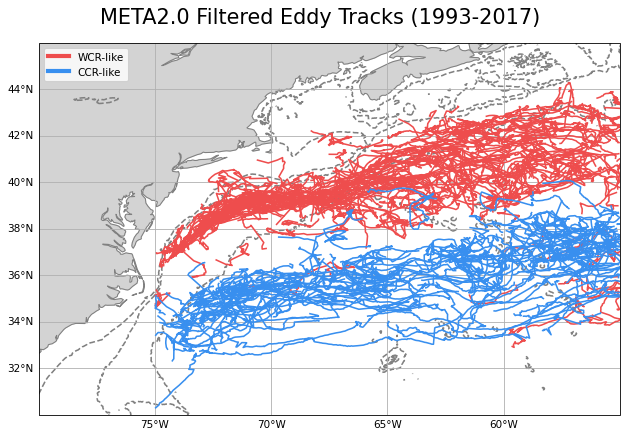

In [3]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"  all_eddy_tracks_map(eddy_ccr_df, eddy_wcr_df, bathy, title, fig_quality)                             "
"                                                                                                       "
" Input:                                                                                                "
"    eddy_ccr_df (DataFrame) : pandas dataframe of CCR-like eddies for all zones                        "
"    eddy_wcr_df (DataFrame) : pandas dataframe of WCR-like eddies for all zones                        "
"    bathy (DataArray)       : xarray DataArray of northwest atlantic bathymetry                        " 
"    title (Str)             : title of the figure, e.g. 'Map of the Northwest Atlantic'                "
"    fig_quality (Int)       : integer of what dpi the image will be set to (e.g., 100 dpi)             "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a map of all the eddie tracks for whole period                                           "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

all_eddy_tracks_map(m2_zone_ccrlike_eddies, m2_zone_wcrlike_eddies, bathy, 'META2.0 Filtered Eddy Tracks (1993-2017)', 75);


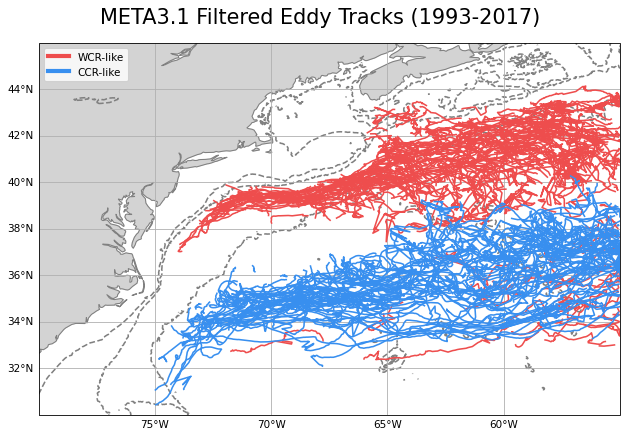

In [16]:
all_eddy_tracks_map(m31_zone_ccrlike_eddies, m31_zone_wcrlike_eddies, bathy, 'META3.1 Filtered Eddy Tracks (1993-2017)', 75);


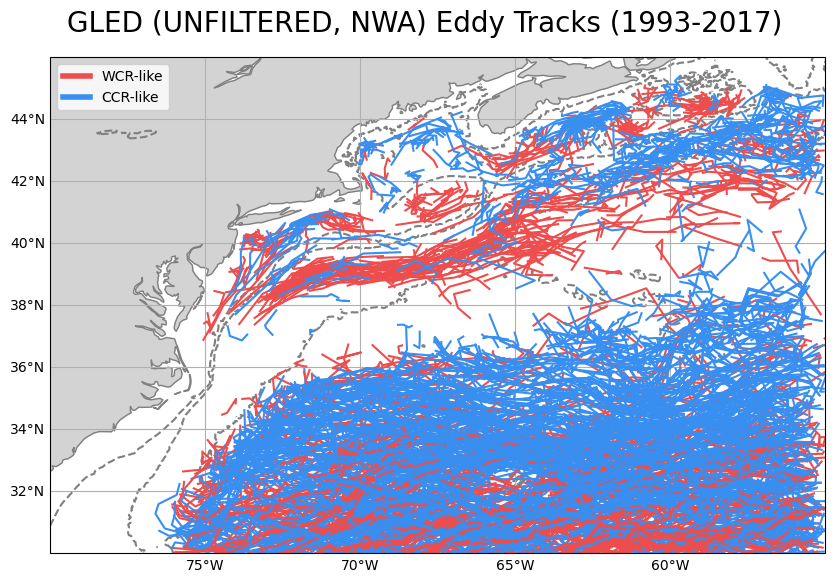

In [155]:
# plot GLED filtered and unfiltered
def gled_all_eddy_tracks_map(eddy30d_ccr_df, eddy30d_wcr_df, eddy90d_ccr_df, eddy90d_wcr_df, eddy180d_ccr_df, eddy180d_wcr_df, bathy, title, fig_quality):
    # gangopadhyay census bounds
    x_bnds = [-80,-55] # lon, NWA: [-82,-48]
    y_bnds = [30,46] # lat, NWA: [24,53]

    # map projection
    proj = ccrs.PlateCarree()

    # create figure 
    fig,ax = plt.subplots(subplot_kw = dict(projection=proj),figsize=(10,7))
    fig.set_dpi(fig_quality)
    fig.suptitle(title, fontsize=20, y=0.925)
    

    Files = {'gled30d_wcr': eddy30d_wcr_df, 'gled30d_ccr': eddy30d_ccr_df, 'gled90d_wcr': eddy90d_wcr_df, 'gled90d_ccr': eddy90d_ccr_df, 'gled180d_wcr': eddy180d_wcr_df, 'gled180d_ccr': eddy180d_ccr_df}

    for whichFile in Files:
        if 'wcr' in whichFile:
            eddy_wcr_df = Files[whichFile]
            ## WCR-like eddies ##
            for i in np.arange(len(eddy_wcr_df)):
                plt.plot(((np.array(eddy_wcr_df.iloc[i]['longitude'])+180)%360)-180,eddy_wcr_df.iloc[i]['latitude'],color='#EE4D4D')

        else: 
            eddy_ccr_df = Files[whichFile]
            # CCR-like eddies ##  
            for i in np.arange(len(eddy_ccr_df)):
                plt.plot(((np.array(eddy_ccr_df.iloc[i]['longitude'])+180)%360)-180,eddy_ccr_df.iloc[i]['latitude'],color='#388FEF')

    # axes formatting
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.contour(bathy.lon,bathy.lat,bathy.z,levels=[-4000,-1000,-100],colors='gray') #,levels=[-4000,-1000,-100]
    ax.coastlines(resolution='50m',color='gray')
    ax.set_extent([x_bnds[0],x_bnds[1],y_bnds[0],y_bnds[1]], crs=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, color='lightgray')  

    # custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='#EE4D4D', lw=4), Line2D([0], [0], color='#388FEF', lw=4)] 
    ax.legend(custom_lines, ['WCR-like', 'CCR-like'], loc='upper left')

    # gridlines
    gl = ax.gridlines(crs=proj,draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.yformatter = LATITUDE_FORMATTER
    gl.xformatter = LONGITUDE_FORMATTER

    return fig,ax

gled_all_eddy_tracks_map(gled30d_zone_ccrlike_eddies, gled30d_zone_wcrlike_eddies, gled90d_zone_ccrlike_eddies, gled90d_zone_wcrlike_eddies, gled180d_zone_ccrlike_eddies, gled180d_zone_wcrlike_eddies, bathy, 'GLED (UNFILTERED, NWA) Eddy Tracks (1993-2017)', 100);


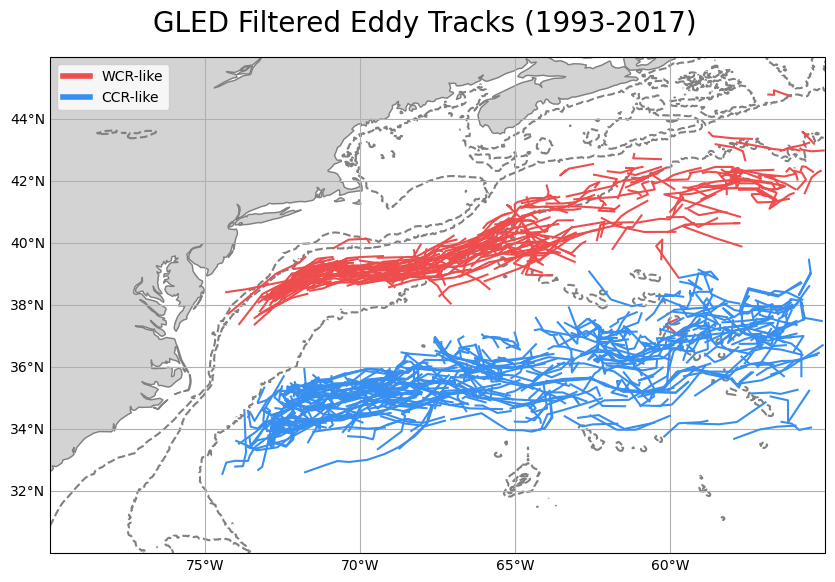

In [171]:
gled_all_eddy_tracks_map(gled30d_zone_ccrlike_eddies, gled30d_zone_wcrlike_eddies, gled90d_zone_ccrlike_eddies, gled90d_zone_wcrlike_eddies, gled180d_zone_ccrlike_eddies, gled180d_zone_wcrlike_eddies, bathy, 'GLED Filtered Eddy Tracks (1993-2017)', 100);


### Spatial Distribution
Plot a bar plot by zone of formations for all ring-like eddies (1993-2017).

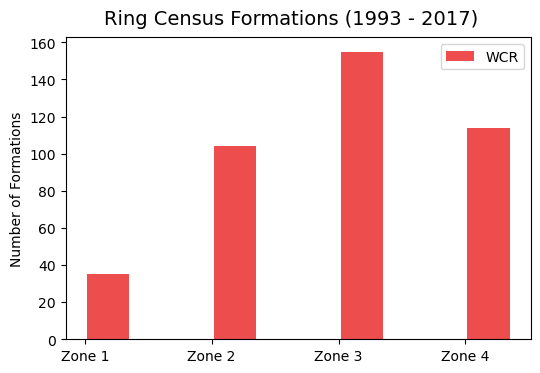

In [206]:
def ringCensus_spatial_formations_barplot(wcr_formations_df, title, fig_quality):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                                                                                                       "
    " Input:                                                                                                "
    "    ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones                   "
    "    wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones                   "
    "    title (Str)             : title of the figure, e.g. 'Map of the Northwest Atlantic'                "
    "    fig_quality (Int)       : integer of what dpi the image will be set to (e.g., 100 dpi)             "
    "                                                                                                       "
    " Output:                                                                                               "
    "    * returns a bar plot for distribution of formations by zone                                        "
    "                                                                                                       "
    "                                                                                                       "
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" 
    # create figure
    fig,ax = plt.subplots();
    fig.suptitle(title+'('+str(int(min(wcr_formations_df['year'])))+' - '+str(int(max(wcr_formations_df['year'])))+')', y=0.95, fontsize=14);
    fig.set_dpi(fig_quality)

    # calculate optimal width of bar plots' bars
    N = 4 # number of bar pairs i want
    ind = np.arange(N)
    width = np.min(np.diff(ind))/3 # Calculate optimal width
    
    zones = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4']

    # plotting
    ax.bar(ind + width, wcr_formations_df[['zone1','zone2','zone3','zone4']].sum(), width, label='WCR', color='#EE4D4D')

    ax.set_xticks([0.15,1.15,2.15,3.15])
    ax.set_xticklabels(zones)
    ax.set_ylabel('Number of Formations');
    ax.legend();
    
    return fig, ax

ringCensus_spatial_formations_barplot(ringCensus_zone_wcr_yyyy_formations, 'Ring Census Formations ', 100);

In [192]:
zone_wcrs_comp_ch_annua_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/pd_dataframes/zone_wcrs_comp_ch_annual_formations.pkl')
zone_wcrs_comp_ch_annual_formations.rename(columns={'zone_1': 'zone1', 'zone_2': 'zone2', 'zone_3': 'zone3', 'zone_4': 'zone4'})



,year,all_zones,zone1,zone2,zone3,zone4
0,1993.0,10.0,1.0,1.0,4.0,4.0
1,1994.0,12.0,0.0,2.0,7.0,3.0
2,1995.0,11.0,0.0,3.0,4.0,4.0
3,1996.0,10.0,2.0,2.0,3.0,3.0
4,1997.0,14.0,0.0,3.0,6.0,5.0
5,1998.0,16.0,1.0,6.0,5.0,4.0
6,1999.0,10.0,0.0,1.0,7.0,2.0
7,2000.0,11.0,1.0,0.0,7.0,3.0
8,2001.0,22.0,2.0,6.0,7.0,7.0
9,2002.0,14.0,1.0,4.0,5.0,4.0


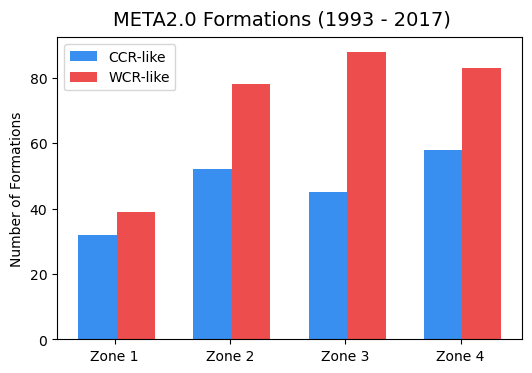

In [17]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"  spatial_formations_barplot(ccr_formations_df, wcr_formations_df, title, fig_quality)                 "
"                                                                                                       "
" Input:                                                                                                "
"    ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones                   "
"    wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones                   "
"    title (Str)             : title of the figure, e.g. 'Map of the Northwest Atlantic'                "
"    fig_quality (Int)       : integer of what dpi the image will be set to (e.g., 100 dpi)             "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a bar plot for distribution of formations by zone                                        "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

spatial_formations_barplot(m2_zone_ccrlike_yyyy_formations, m2_zone_wcrlike_yyyy_formations, 'META2.0 Formations ', 100);


In [6]:
m2_zone_wcrlike_yyyy_formations[['zone1','zone2','zone3','zone4']].sum()

zone1    40.0
zone2    78.0
zone3    89.0
zone4    83.0
dtype: float64

In [12]:
m2_zone_wcrlike_yyyy_formations['all_zones'].sum()+m2_zone_ccrlike_yyyy_formations['all_zones'].sum()
m2_zone_wcrlike_yyyy_formations['all_zones'].sum()

290.0

In [10]:
print('zone 1 % = ',m2_zone_wcrlike_yyyy_formations[['zone1']].sum()/(m2_zone_wcrlike_yyyy_formations['all_zones'].sum())*100) # clark 1980-2019 = 12 %
print('zone 2 % = ',m2_zone_wcrlike_yyyy_formations[['zone2']].sum()/(m2_zone_wcrlike_yyyy_formations['all_zones'].sum())*100) # clark 1980-2019 = 20 %
print('zone 3 % = ',m2_zone_wcrlike_yyyy_formations[['zone3']].sum()/(m2_zone_wcrlike_yyyy_formations['all_zones'].sum())*100) # clark 1980-2019 = 37 %
print('zone 4 % = ',m2_zone_wcrlike_yyyy_formations[['zone4']].sum()/(m2_zone_wcrlike_yyyy_formations['all_zones'].sum())*100) # clark 1980-2019 = 31 %

zone 1 % =  zone1    13.793103
dtype: float64
zone 2 % =  zone2    26.896552
dtype: float64
zone 3 % =  zone3    30.689655
dtype: float64
zone 4 % =  zone4    28.62069
dtype: float64


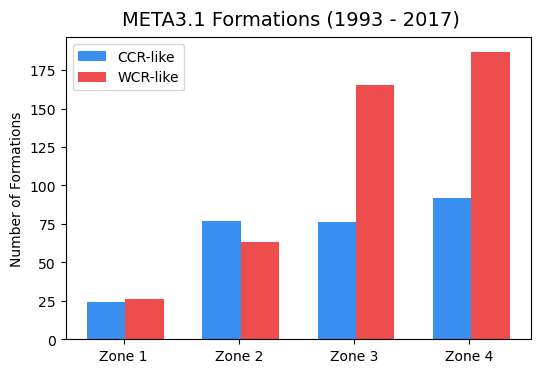

In [37]:
spatial_formations_barplot(m31_zone_ccrlike_yyyy_formations, m31_zone_wcrlike_yyyy_formations, 'META3.1 Formations ', 100);


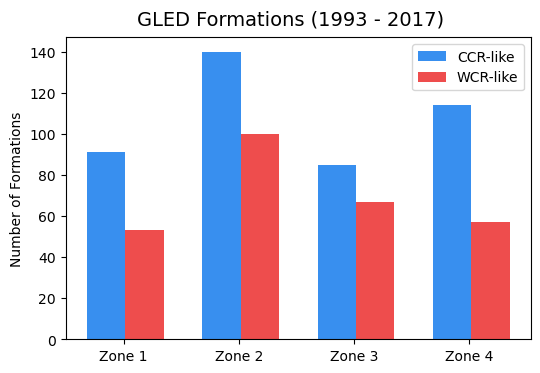

In [172]:
spatial_formations_barplot(gled_zone_ccrlike_yyyy_formations, gled_zone_wcrlike_yyyy_formations, 'GLED Formations ', 100);


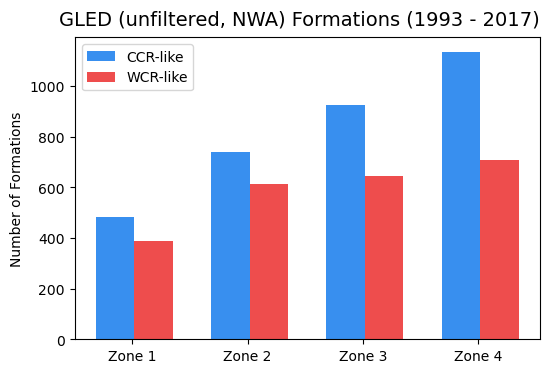

In [156]:
spatial_formations_barplot(gled_zone_ccrlike_yyyy_formations, gled_zone_wcrlike_yyyy_formations, 'GLED (unfiltered, NWA) Formations ', 100);


In [ ]:
# need to also plot the chelton spatial distribution

### Seasonality
Plot a line plot of the seasonal cycle of formations for all ring-like eddies (1993-2017).

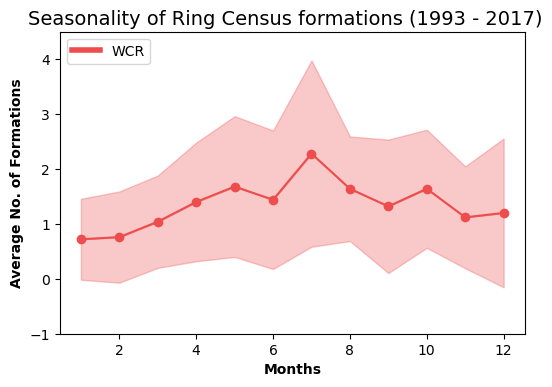

In [238]:
# )
def ringCensus_seasonality_lineplot(wcr_formations_df, title, ylim_min, ylim_max, fig_quality):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                                                                                                       "
    " Input:                                                                                                "
    "    ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones                   "
    "    wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones                   "
    "    title (Str)                   : title of the figure, e.g. 'Map of the Northwest Atlantic'          "
    "    fig_quality (Int)             : integer of what dpi the image will be set to (e.g., 100 dpi)       "
    "                                                                                                       "
    " Output:                                                                                               "
    "    * returns a bar plot for distribution of formations by zone                                        "
    "                                                                                                       "
    "                                                                                                       "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    # calculate average monthly formations
    # initialize
    wcr_monthly_std = [] # WCRS
    wcr_monthly_avg = []
    ccr_monthly_std = [] # CCRs
    ccr_monthly_avg = []
    # compute means & std
    for i in np.arange(1,13):
        wcr_monthly_std.append((wcr_formations_df[wcr_formations_df['month']==i]['all_zones']).std())
        wcr_monthly_avg.append(wcr_formations_df[wcr_formations_df['month']==i]['all_zones'].mean())
        
    # lines for standard deviation
    wcr_minus_std = np.subtract(wcr_monthly_avg,wcr_monthly_std)
    wcr_plus_std = np.add(wcr_monthly_avg,wcr_monthly_std)

    fig,ax = plt.subplots()
    fig.set_dpi(fig_quality)
    fig.suptitle(title+'('+str(int(min(wcr_formations_df['year'])))+' - '+str(int(max(wcr_formations_df['year'])))+')', y=0.935, fontsize=14);

    # plot
    ax.plot(wcr_formations_df['month'].drop_duplicates(),wcr_monthly_avg,'-o',color='#EE4D4D');
    ax.fill_between(wcr_formations_df['month'].drop_duplicates(), wcr_plus_std, wcr_monthly_avg, alpha=0.3, color='#EE4D4D')
    ax.fill_between(wcr_formations_df['month'].drop_duplicates(), wcr_minus_std, wcr_monthly_avg, alpha=0.3, color='#EE4D4D')
    
    zones = ['zone_1', 'zone_2', 'zone_3', 'zone_4']

    # axes formatting
    ax.set_xlabel('Months', fontweight='bold')
    ax.set_ylabel('Average No. of Formations',fontweight='bold');
    ax.set_ylim(ylim_min,ylim_max)
    ax.set_xlim(1,12)

    # custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='#EE4D4D', lw=4), Line2D([0], [0], color='#388FEF', lw=4)]
    ax.legend(custom_lines, ['WCR'], loc='upper left');
    
    return fig,ax

ringCensus_seasonality_lineplot(ringCensus_zone_wcr_yyyy_mm_formations, 'Seasonality of Ring Census formations ', -1, 4.5,100);



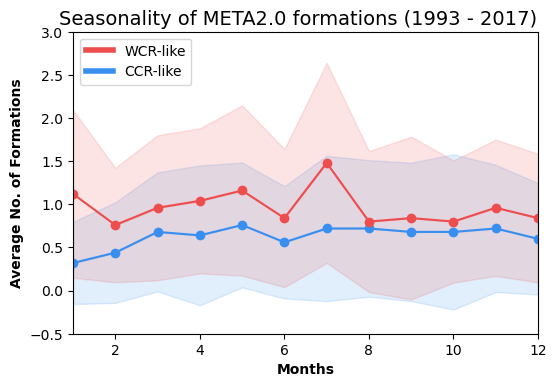

In [4]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"  seasonality_lineplot(ccr_formations_df, wcr_formations_df, title, fig_quality)                       "
"                                                                                                       "
" Input:                                                                                                "
"    ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones                   "
"    wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones                   "
"    title (Str)                   : title of the figure, e.g. 'Map of the Northwest Atlantic'          "
"    fig_quality (Int)             : integer of what dpi the image will be set to (e.g., 100 dpi)       "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a line plot of average monthly formations (seasonality)                                  "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

def seasonality_lineplot(ccr_formations_df, wcr_formations_df, title, ylim_min, ylim_max, fig_quality):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                                                                                                       "
    " Input:                                                                                                "
    "    ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones                   "
    "    wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones                   "
    "    title (Str)                   : title of the figure, e.g. 'Map of the Northwest Atlantic'          "
    "    fig_quality (Int)             : integer of what dpi the image will be set to (e.g., 100 dpi)       "
    "                                                                                                       "
    " Output:                                                                                               "
    "    * returns a bar plot for distribution of formations by zone                                        "
    "                                                                                                       "
    "                                                                                                       "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    # calculate average monthly formations
    # initialize
    wcr_monthly_std = [] # WCRS
    wcr_monthly_avg = []
    ccr_monthly_std = [] # CCRs
    ccr_monthly_avg = []
    # compute means & std
    for i in np.arange(1,13):
        wcr_monthly_std.append((wcr_formations_df[wcr_formations_df['month']==i]['all_zones']).std())
        ccr_monthly_std.append((ccr_formations_df[ccr_formations_df['month']==i]['all_zones']).std())
        ccr_monthly_avg.append(ccr_formations_df[ccr_formations_df['month']==i]['all_zones'].mean())
        wcr_monthly_avg.append(wcr_formations_df[wcr_formations_df['month']==i]['all_zones'].mean())
        
    # lines for standard deviation
    ccr_minus_std = np.subtract(ccr_monthly_avg,ccr_monthly_std)
    wcr_minus_std = np.subtract(wcr_monthly_avg,wcr_monthly_std)
    ccr_plus_std = np.add(ccr_monthly_avg,ccr_monthly_std)
    wcr_plus_std = np.add(wcr_monthly_avg,wcr_monthly_std)

    fig,ax = plt.subplots()
    fig.set_dpi(fig_quality)
    fig.suptitle(title+'('+str(int(min(ccr_formations_df['year'])))+' - '+str(int(max(ccr_formations_df['year'])))+')', y=0.935, fontsize=14);

    # plot
    ## CCR-like
    ax.plot(ccr_formations_df['month'].drop_duplicates(),ccr_monthly_avg,'-o',color='#388FEF');
#     plt.errorbar(ccr_formations_df['month'].drop_duplicates(), ccr_monthly_avg, ccr_plus_std/2, linestyle='None', marker='^', color='#388FEF')
    ax.fill_between(ccr_formations_df['month'].drop_duplicates(), ccr_plus_std, ccr_monthly_avg, alpha=0.15, color='#388FEF')
    ax.fill_between(ccr_formations_df['month'].drop_duplicates(), ccr_minus_std, ccr_monthly_avg, alpha=0.15, color='#388FEF')
    
    ## WCR-like
    ax.plot(wcr_formations_df['month'].drop_duplicates(),wcr_monthly_avg,'-o',color='#EE4D4D');
#     plt.errorbar(wcr_formations_df['month'].drop_duplicates(), wcr_monthly_avg, wcr_plus_std/2, linestyle='None', marker='^', color='#EE4D4D')
    ax.fill_between(wcr_formations_df['month'].drop_duplicates(), wcr_plus_std, wcr_monthly_avg, alpha=0.15, color='#EE4D4D')
    ax.fill_between(wcr_formations_df['month'].drop_duplicates(), wcr_minus_std, wcr_monthly_avg, alpha=0.15, color='#EE4D4D')
    
    zones = ['zone_1', 'zone_2', 'zone_3', 'zone_4']

    # axes formatting
    ax.set_xlabel('Months', fontweight='bold')
    ax.set_ylabel('Average No. of Formations',fontweight='bold');
    ax.set_ylim(ylim_min,ylim_max)
    ax.set_xlim(1,12)

    # custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='#EE4D4D', lw=4), Line2D([0], [0], color='#388FEF', lw=4)]
    ax.legend(custom_lines, ['WCR-like', 'CCR-like'], loc='upper left');
    
    return fig,ax

seasonality_lineplot(m2_zone_ccrlike_yyyy_mm_formations, m2_zone_wcrlike_yyyy_mm_formations, 'Seasonality of META2.0 formations ', -0.5, 3,100);


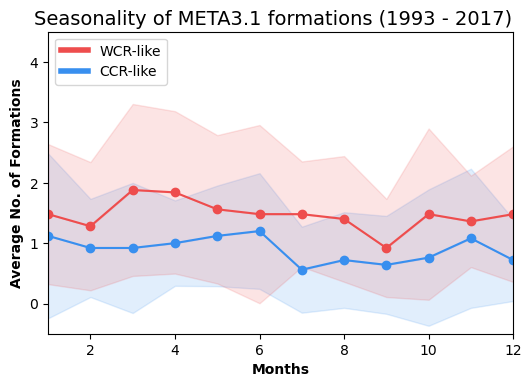

In [5]:
seasonality_lineplot(m31_zone_ccrlike_yyyy_mm_formations, m31_zone_wcrlike_yyyy_mm_formations, 'Seasonality of META3.1 formations ', -0.5, 4.5,100);


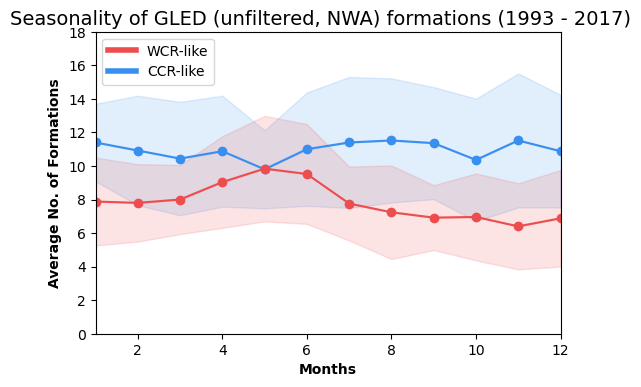

In [276]:
seasonality_lineplot(gled_zone_ccrlike_yyyy_mm_formations, gled_zone_wcrlike_yyyy_mm_formations, 'Seasonality of GLED (unfiltered, NWA) formations ', 0, 18, 100);


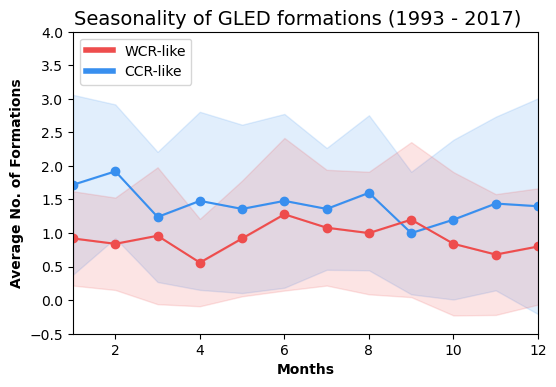

In [285]:
seasonality_lineplot(gled_zone_ccrlike_yyyy_mm_formations, gled_zone_wcrlike_yyyy_mm_formations, 'Seasonality of GLED formations ', -0.5, 4, 100);


### Regime Shift
Plot a line plot of the time-series for annual formations for all ring-like eddies (1993-2017).


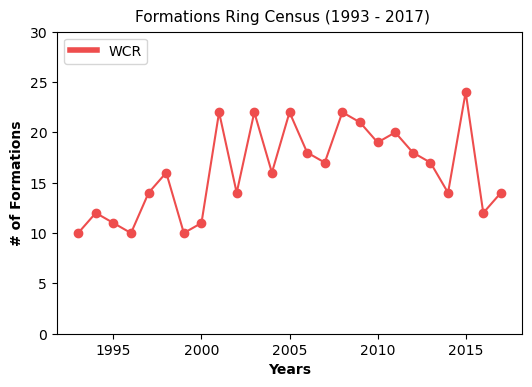

In [226]:
def ringCensus_timeseries_lineplot(wcr_formations_df, title, fig_quality, ylim_min, ylim_max):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                                                                                                       "
    " Input:                                                                                                "
    "    ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones                   "
    "    wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones                   "
    "    title (Str)                   : title of the figure, e.g. 'Map of the Northwest Atlantic'          "
    "    fig_quality (Int)             : integer of what dpi the image will be set to (e.g., 100 dpi)       "
    "    ylim_min (Int)                : integer of lowest yaxis tick mar                                   "
    "    ylim_max (Int)                : integer of highest yaxis tick mar                                   "
    "                                                                                                       "
    " Output:                                                                                               "
    "    * returns a line plot annual formations for whole period (time-series)                             "
    "                                                                                                       "
    "                                                                                                       "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    # compute means for pre/post-2000 formations
    min_year_wcr = int(min(wcr_formations_df['year']))
    max_year_wcr = int(max(wcr_formations_df['year']))
    pre_2000_wcr = wcr_formations_df[wcr_formations_df['year']<2000] # mean rings count pre-2000
    post_2000_wcr = wcr_formations_df[wcr_formations_df['year']>=2000] # mean ring count post-2000
    
    # create figure & axes
    fig,ax = plt.subplots() # figsize=(10,5), for comparison to Fig. 2 Silver et al., 2021
    fig.set_dpi(fig_quality)
    fig.suptitle(title+str(int(min(wcr_formations_df['year'])))+' - '+str(int(max(wcr_formations_df['year'])))+')', y=0.935, fontsize=11);

    # WCR-like eddies
    ax.plot(wcr_formations_df['year'],wcr_formations_df['all_zones'],'-o',color='#EE4D4D')
#     ax.plot([min_year_wcr,2000],[pre_2000_wcr['all_zones'].mean(),pre_2000_wcr['all_zones'].mean()], color='r', linestyle='-'); # pre_2000 average
#     ax.plot([2000,max_year_wcr],[post_2000_wcr['all_zones'].mean(),post_2000_wcr['all_zones'].mean()], color='r', linestyle='-'); # post_2000 average

    # axes formatting
    ax.set_xlabel('Years',fontweight='bold')
    ax.set_ylabel('# of Formations',fontweight='bold');
    ax.set_ylim(ylim_min, ylim_max) # 1993-2017
#     ax.set_xlim(1980,2020) # to compare to fig. 2 Silver et al., 2021

    # custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='#EE4D4D', lw=4), Line2D([0], [0], color='#388FEF', lw=4)]
    ax.legend(custom_lines, ['WCR'], loc='upper left');
    
    return fig,ax

ringCensus_timeseries_lineplot(ringCensus_zone_wcr_yyyy_formations, 'Formations Ring Census (', 100, 0, 30);



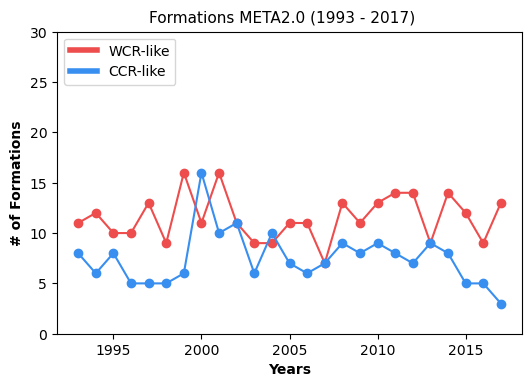

In [55]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"  timeseries_lineplot(ccr_formations_df, wcr_formations_df, title, fig_quality)                        "
"                                                                                                       "
" Input:                                                                                                "
"    ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones                   "
"    wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones                   "
"    title (Str)                   : title of the figure, e.g. 'Map of the Northwest Atlantic'          "
"    fig_quality (Int)             : integer of what dpi the image will be set to (e.g., 100 dpi)       "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a line plot annual formations for whole period (time-series)                             "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

timeseries_lineplot(m2_zone_ccrlike_yyyy_formations, m2_zone_wcrlike_yyyy_formations, 'Formations META2.0 (', 100, 0, 30);


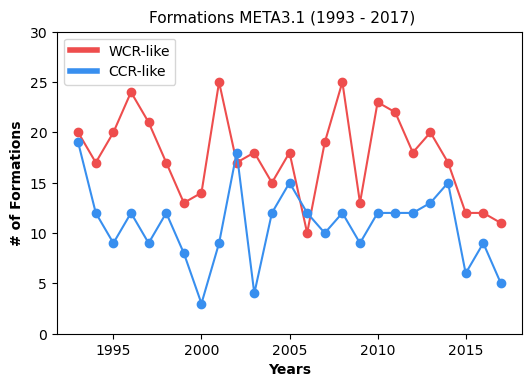

In [53]:
timeseries_lineplot(m31_zone_ccrlike_yyyy_formations, m31_zone_wcrlike_yyyy_formations, 'Formations META3.1 (', 100, 0, 30);


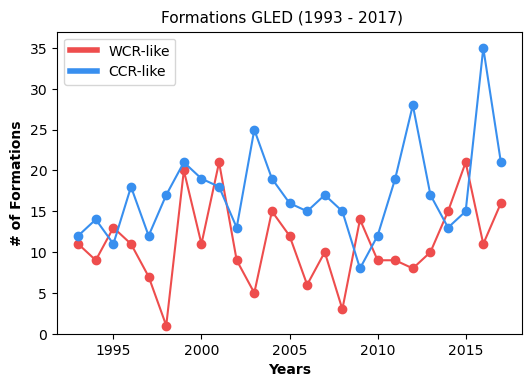

In [176]:
timeseries_lineplot(gled_zone_ccrlike_yyyy_formations, gled_zone_wcrlike_yyyy_formations, 'Formations GLED (', 100, 0, 37);


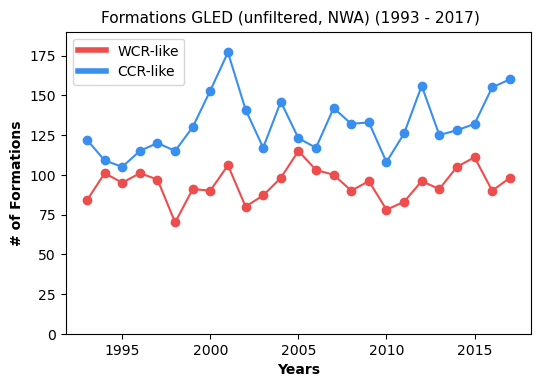

In [166]:
timeseries_lineplot(gled_zone_ccrlike_yyyy_formations, gled_zone_wcrlike_yyyy_formations, 'Formations GLED (unfiltered, NWA) (', 100, 0, 190);


#### Changepoint Analysis
Perform a changepoint analysis on the time-series and plot the results.

To be consisent with Gangopadhyay et al., 2019 and Silver et al., 2021, we employ the same regime shift detection software; [Rodionov regime shift detection](https://sites.google.com/view/regime-shift-test/home). 

This software requires Excel 2007 or newer to run. The .xlsx files needed are created by the *formation_counts_df_to_excel()* call in the "Process Data" section above. The files are saved in the data/excel folder. 

<UL> <b>data</b>
    <UL> <b>excel</b> <br>
      <UL> meta2_zone_ringlike_yyyy_formations.xlsx <br> </UL>
      <UL> meta31_zone_ringlike_yyyy_formations.xlsx <br> </UL>
</UL>
</UL>

<img src="https://i.imgur.com/AShFeGw.png" style="height:500px" />

No signifcant regime shift was detected for META2.0 ring-like eddies nor for META3.1exp ring-like eddies. The software did detect a regime shift for WCRs from the ring census data, but not CCRs-- which was found in Gangopadhyay et al., 2019; Silver et al., 2021.

<div class="alert alert-block alert-danger">
No signifcant regime shift was detected for META2.0 ring-like eddies, META3.1exp ring-like eddies, nor the GLED ring-like eddies.
</div>

<img src="https://i.imgur.com/VFsOw0y.png" style="height:500px" />

<img src="https://i.imgur.com/J0cRT68.png" style="height:500px" />

<img src="https://i.imgur.com/4hqPHcC.png" style="height:500px" />


<div class="alert alert-block alert-success">
The software did detect a signifcant regime shift in 2000 for WCRs from the ring census data (subset by similar time period and spatial/temporal constraints at META2.0), but not CCRs– which is what was originally reported by Gangopadhyay et al., 2019; Silver et al., 2021.
</div>

<img src="https://i.imgur.com/dlRojmF.png" style="height:500px" />


In [ ]:
# write down what makes something significant 
# i think its p value has to be >0.5